# **Marketing Analytics & Customer Segmentation**

### **A) Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **B) Importing & Reading the data**

In [2]:
df = pd.read_csv('/content/marketing_customer.csv')

In [3]:
df.head()

customer_id  age  gender location       channel  annual_income  \
0  CUST_22947   34     NaN   mumbai           SMS       624031.0   
1  CUST_81735   20       M      NaN         email       628082.0   
2  CUST_20577   44  Female    Delhi  Social Media       657122.0   
3  CUST_21572   19       F   mumbai           sms       662408.0   
4  CUST_95701   45    Male      NaN           Ads       728220.0   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0             6.0   17725.91871           17-07-23         0.328788   
1             7.0   14201.49484           29-03-22         0.131975   
2             9.0   13021.94741           03-11-22         0.000000   
3            10.0   14379.04888           20-03-22         0.467075   
4             NaN    8875.67917           29-01-24         0.548451   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0            0.108870                2                   NaN   
1            0.055184                4            zzJDFudKNF   
2            0.116521                1            NStwTGkMCf   
3            0.117758                4                   NaN   
4            0.052100                6                   NaN   

   random_numeric_noise  
0              0.394539  
1             -0.924181  
2             -0.390897  
3              1.452262  
4              0.279679

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            125000 non-null  object 
 1   age                    125000 non-null  int64  
 2   gender                 107089 non-null  object 
 3   location               109329 non-null  object 
 4   channel                109293 non-null  object 
 5   annual_income          121927 non-null  float64
 6   purchase_count         121896 non-null  float64
 7   amount_spent           121933 non-null  float64
 8   last_purchase_date     125000 non-null  object 
 9   email_open_rate        125000 non-null  float64
 10  click_through_rate     125000 non-null  float64
 11  ad_interactions        125000 non-null  int64  
 12  irrelevant_text_noise  12636 non-null   object 
 13  random_numeric_noise   125000 non-null  float64
dtypes: float64(6), int64(2), object(6)
m

In [5]:
df.shape

(125000, 14)

In [6]:
df.dtypes

customer_id               object
age                        int64
gender                    object
location                  object
channel                   object
annual_income            float64
purchase_count           float64
amount_spent             float64
last_purchase_date        object
email_open_rate          float64
click_through_rate       float64
ad_interactions            int64
irrelevant_text_noise     object
random_numeric_noise     float64
dtype: object

In [7]:
df.describe()

age  annual_income  purchase_count   amount_spent  \
count  125000.000000   1.219270e+05   121896.000000  121933.000000   
mean       34.530336   7.025328e+05        8.004102    9614.497679   
std        11.995570   2.388178e+05        2.832056    5377.489754   
min       -18.000000  -1.211020e+05        0.000000       0.000000   
25%        26.000000   5.645085e+05        6.000000    5704.933717   
50%        35.000000   7.000230e+05        8.000000    8824.482585   
75%        43.000000   8.358375e+05       10.000000   12679.336060   
max        88.000000   1.001641e+07       23.000000   51335.898270   

       email_open_rate  click_through_rate  ad_interactions  \
count    125000.000000       125000.000000    125000.000000   
mean          0.252984            0.071897         2.998232   
std           0.143738            0.046587         1.722435   
min           0.000000            0.000000         0.000000   
25%           0.148904            0.036351         2.000000   
50%           0.250080            0.069963         3.000000   
75%           0.350457            0.103851         4.000000   
max           0.895417            0.279503        12.000000   

       random_numeric_noise  
count         125000.000000  
mean               0.004751  
std                0.998114  
min               -4.496043  
25%               -0.665752  
50%                0.008020  
75%                0.674312  
max                4.276790

### **C) Cleaning the Data**

In [8]:
# Checking & handling missing values
df.isnull().sum()

customer_id                   0
age                           0
gender                    17911
location                  15671
channel                   15707
annual_income              3073
purchase_count             3104
amount_spent               3067
last_purchase_date            0
email_open_rate               0
click_through_rate            0
ad_interactions               0
irrelevant_text_noise    112364
random_numeric_noise          0
dtype: int64

In [9]:
# replacing categorical values with unknown
cols_to_replace = ["gender", "location", "channel", "irrelevant_text_noise"]

df[cols_to_replace] = df[cols_to_replace].fillna("unknown")

In [10]:
# replacing numerical values with median values
num_cols = ["annual_income", "purchase_count", "amount_spent"]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
df.isnull().sum()

customer_id              0
age                      0
gender                   0
location                 0
channel                  0
annual_income            0
purchase_count           0
amount_spent             0
last_purchase_date       0
email_open_rate          0
click_through_rate       0
ad_interactions          0
irrelevant_text_noise    0
random_numeric_noise     0
dtype: int64

- Now, the dataset has no missing values

In [12]:
# Converting data into their proper data types
df.dtypes

customer_id               object
age                        int64
gender                    object
location                  object
channel                   object
annual_income            float64
purchase_count           float64
amount_spent             float64
last_purchase_date        object
email_open_rate          float64
click_through_rate       float64
ad_interactions            int64
irrelevant_text_noise     object
random_numeric_noise     float64
dtype: object

In [13]:
df["annual_income"] = pd.to_numeric(df["annual_income"], errors="coerce")
df["purchase_count"] = pd.to_numeric(df["purchase_count"], errors="coerce")
df["amount_spent"] = pd.to_numeric(df["amount_spent"], errors="coerce")

In [14]:
df.head()

customer_id  age   gender location       channel  annual_income  \
0  CUST_22947   34  unknown   mumbai           SMS       624031.0   
1  CUST_81735   20        M  unknown         email       628082.0   
2  CUST_20577   44   Female    Delhi  Social Media       657122.0   
3  CUST_21572   19        F   mumbai           sms       662408.0   
4  CUST_95701   45     Male  unknown           Ads       728220.0   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0             6.0   17725.91871           17-07-23         0.328788   
1             7.0   14201.49484           29-03-22         0.131975   
2             9.0   13021.94741           03-11-22         0.000000   
3            10.0   14379.04888           20-03-22         0.467075   
4             8.0    8875.67917           29-01-24         0.548451   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0            0.108870                2               unknown   
1            0.055184                4            zzJDFudKNF   
2            0.116521                1            NStwTGkMCf   
3            0.117758                4               unknown   
4            0.052100                6               unknown   

   random_numeric_noise  
0              0.394539  
1             -0.924181  
2             -0.390897  
3              1.452262  
4              0.279679

In [15]:
# 1. Convert annual_income to float → int
# ---------------------------
df["annual_income"] = pd.to_numeric(df["annual_income"], errors="coerce")

# Replace nulls before converting to int
df["annual_income"] = df["annual_income"].fillna(df["annual_income"].median())

# Convert to integer
df["annual_income"] = df["annual_income"].astype(int)

In [16]:
# 2. Convert purchase_count float → int
# ---------------------------
df["purchase_count"] = pd.to_numeric(df["purchase_count"], errors="coerce")

# Replace nulls with mean or median (choose one)
df["purchase_count"] = df["purchase_count"].fillna(df["purchase_count"].median())

df["purchase_count"] = df["purchase_count"].astype(int)

In [17]:
# 3. Convert last_purchase_date object → datetime
# ---------------------------
df["last_purchase_date"] = pd.to_datetime(df["last_purchase_date"], errors="coerce")

# If any dates fail conversion (NaT), optionally fill with a default
df["last_purchase_date"] = df["last_purchase_date"].fillna(pd.to_datetime("2023-01-01"))

In [18]:
df.dtypes

customer_id                      object
age                               int64
gender                           object
location                         object
channel                          object
annual_income                     int64
purchase_count                    int64
amount_spent                    float64
last_purchase_date       datetime64[ns]
email_open_rate                 float64
click_through_rate              float64
ad_interactions                   int64
irrelevant_text_noise            object
random_numeric_noise            float64
dtype: object

In [19]:
df.head()

customer_id  age   gender location       channel  annual_income  \
0  CUST_22947   34  unknown   mumbai           SMS         624031   
1  CUST_81735   20        M  unknown         email         628082   
2  CUST_20577   44   Female    Delhi  Social Media         657122   
3  CUST_21572   19        F   mumbai           sms         662408   
4  CUST_95701   45     Male  unknown           Ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0               6   17725.91871         2023-07-17         0.328788   
1               7   14201.49484         2022-03-29         0.131975   
2               9   13021.94741         2022-03-11         0.000000   
3              10   14379.04888         2022-03-20         0.467075   
4               8    8875.67917         2024-01-29         0.548451   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0            0.108870                2               unknown   
1            0.055184                4            zzJDFudKNF   
2            0.116521                1            NStwTGkMCf   
3            0.117758                4               unknown   
4            0.052100                6               unknown   

   random_numeric_noise  
0              0.394539  
1             -0.924181  
2             -0.390897  
3              1.452262  
4              0.279679

In [20]:
# Round specific columns to 2 decimals
cols_to_round = [
    "amount_spent",
    "email_open_rate",
    "click_through_rate",
    "random_numeric_noise"
]

df[cols_to_round] = df[cols_to_round].round(2)

In [21]:
df.head()

customer_id  age   gender location       channel  annual_income  \
0  CUST_22947   34  unknown   mumbai           SMS         624031   
1  CUST_81735   20        M  unknown         email         628082   
2  CUST_20577   44   Female    Delhi  Social Media         657122   
3  CUST_21572   19        F   mumbai           sms         662408   
4  CUST_95701   45     Male  unknown           Ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0               6      17725.92         2023-07-17             0.33   
1               7      14201.49         2022-03-29             0.13   
2               9      13021.95         2022-03-11             0.00   
3              10      14379.05         2022-03-20             0.47   
4               8       8875.68         2024-01-29             0.55   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0                0.11                2               unknown   
1                0.06                4            zzJDFudKNF   
2                0.12                1            NStwTGkMCf   
3                0.12                4               unknown   
4                0.05                6               unknown   

   random_numeric_noise  
0                  0.39  
1                 -0.92  
2                 -0.39  
3                  1.45  
4                  0.28

In [22]:
# Converting categorical data into proper case
df["gender"] = (
    df["gender"]
    .astype(str)       # Convert to string (handles None)
    .str.strip()       # Remove spaces
    .str.lower()       # Convert to lowercase
    .map({
        "m": "male",
        "male": "male",
        "f": "female",
        "female": "female"
    })
)

In [23]:
df.head()

customer_id  age  gender location       channel  annual_income  \
0  CUST_22947   34     NaN   mumbai           SMS         624031   
1  CUST_81735   20    male  unknown         email         628082   
2  CUST_20577   44  female    Delhi  Social Media         657122   
3  CUST_21572   19  female   mumbai           sms         662408   
4  CUST_95701   45    male  unknown           Ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0               6      17725.92         2023-07-17             0.33   
1               7      14201.49         2022-03-29             0.13   
2               9      13021.95         2022-03-11             0.00   
3              10      14379.05         2022-03-20             0.47   
4               8       8875.68         2024-01-29             0.55   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0                0.11                2               unknown   
1                0.06                4            zzJDFudKNF   
2                0.12                1            NStwTGkMCf   
3                0.12                4               unknown   
4                0.05                6               unknown   

   random_numeric_noise  
0                  0.39  
1                 -0.92  
2                 -0.39  
3                  1.45  
4                  0.28

In [24]:
cols_to_lower = ["gender", "location", "channel"]

df[cols_to_lower] = df[cols_to_lower].apply(lambda col: col.str.lower())

In [25]:
df.head()

customer_id  age  gender location       channel  annual_income  \
0  CUST_22947   34     NaN   mumbai           sms         624031   
1  CUST_81735   20    male  unknown         email         628082   
2  CUST_20577   44  female    delhi  social media         657122   
3  CUST_21572   19  female   mumbai           sms         662408   
4  CUST_95701   45    male  unknown           ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0               6      17725.92         2023-07-17             0.33   
1               7      14201.49         2022-03-29             0.13   
2               9      13021.95         2022-03-11             0.00   
3              10      14379.05         2022-03-20             0.47   
4               8       8875.68         2024-01-29             0.55   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0                0.11                2               unknown   
1                0.06                4            zzJDFudKNF   
2                0.12                1            NStwTGkMCf   
3                0.12                4               unknown   
4                0.05                6               unknown   

   random_numeric_noise  
0                  0.39  
1                 -0.92  
2                 -0.39  
3                  1.45  
4                  0.28

In [26]:
df.isnull().sum()

customer_id                  0
age                          0
gender                   17911
location                     0
channel                      0
annual_income                0
purchase_count               0
amount_spent                 0
last_purchase_date           0
email_open_rate              0
click_through_rate           0
ad_interactions              0
irrelevant_text_noise        0
random_numeric_noise         0
dtype: int64

In [27]:
df['gender'] = df['gender'].fillna('unknown')

In [28]:
df.head()

customer_id  age   gender location       channel  annual_income  \
0  CUST_22947   34  unknown   mumbai           sms         624031   
1  CUST_81735   20     male  unknown         email         628082   
2  CUST_20577   44   female    delhi  social media         657122   
3  CUST_21572   19   female   mumbai           sms         662408   
4  CUST_95701   45     male  unknown           ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0               6      17725.92         2023-07-17             0.33   
1               7      14201.49         2022-03-29             0.13   
2               9      13021.95         2022-03-11             0.00   
3              10      14379.05         2022-03-20             0.47   
4               8       8875.68         2024-01-29             0.55   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0                0.11                2               unknown   
1                0.06                4            zzJDFudKNF   
2                0.12                1            NStwTGkMCf   
3                0.12                4               unknown   
4                0.05                6               unknown   

   random_numeric_noise  
0                  0.39  
1                 -0.92  
2                 -0.39  
3                  1.45  
4                  0.28

In [29]:
df.isnull().sum()

customer_id              0
age                      0
gender                   0
location                 0
channel                  0
annual_income            0
purchase_count           0
amount_spent             0
last_purchase_date       0
email_open_rate          0
click_through_rate       0
ad_interactions          0
irrelevant_text_noise    0
random_numeric_noise     0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(5000)

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.shape

(120000, 14)

In [34]:
df.head()

customer_id  age   gender location       channel  annual_income  \
0  CUST_22947   34  unknown   mumbai           sms         624031   
1  CUST_81735   20     male  unknown         email         628082   
2  CUST_20577   44   female    delhi  social media         657122   
3  CUST_21572   19   female   mumbai           sms         662408   
4  CUST_95701   45     male  unknown           ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0               6      17725.92         2023-07-17             0.33   
1               7      14201.49         2022-03-29             0.13   
2               9      13021.95         2022-03-11             0.00   
3              10      14379.05         2022-03-20             0.47   
4               8       8875.68         2024-01-29             0.55   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0                0.11                2               unknown   
1                0.06                4            zzJDFudKNF   
2                0.12                1            NStwTGkMCf   
3                0.12                4               unknown   
4                0.05                6               unknown   

   random_numeric_noise  
0                  0.39  
1                 -0.92  
2                 -0.39  
3                  1.45  
4                  0.28

In [35]:
df.dtypes

customer_id                      object
age                               int64
gender                           object
location                         object
channel                          object
annual_income                     int64
purchase_count                    int64
amount_spent                    float64
last_purchase_date       datetime64[ns]
email_open_rate                 float64
click_through_rate              float64
ad_interactions                   int64
irrelevant_text_noise            object
random_numeric_noise            float64
dtype: object

- All the duplicates from the dataset have been removed.

In [36]:
# Checking & Handling the outliers
num_cols = df.select_dtypes(include=['int64','float64']).columns

outlier_bounds = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_bounds[col] = (lower_bound, upper_bound)

outlier_bounds

{'age': (np.float64(0.5), np.float64(68.5)),
 'annual_income': (np.float64(173122.25), np.float64(1227178.25)),
 'purchase_count': (np.float64(0.0), np.float64(16.0)),
 'amount_spent': (np.float64(-4385.4175000000005), np.float64(22720.9225)),
 'email_open_rate': (np.float64(-0.15), np.float64(0.6499999999999999)),
 'click_through_rate': (np.float64(-0.05000000000000001), np.float64(0.19)),
 'ad_interactions': (np.float64(-1.0), np.float64(7.0)),
 'random_numeric_noise': (np.float64(-2.68), np.float64(2.68))}

In [37]:
outlier_summary = {}

for col in num_cols:
    lb, ub = outlier_bounds[col]
    outliers = df[(df[col] < lb) | (df[col] > ub)][col].count()
    outlier_summary[col] = outliers

outlier_summary

{'age': np.int64(556),
 'annual_income': np.int64(1075),
 'purchase_count': np.int64(451),
 'amount_spent': np.int64(2526),
 'email_open_rate': np.int64(543),
 'click_through_rate': np.int64(801),
 'ad_interactions': np.int64(1358),
 'random_numeric_noise': np.int64(870)}

In [38]:
# Handling outliers using Cap method
for col in num_cols:
    lb, ub = outlier_bounds[col]
    df[col] = np.where(df[col] < lb, lb,
                np.where(df[col] > ub, ub, df[col]))

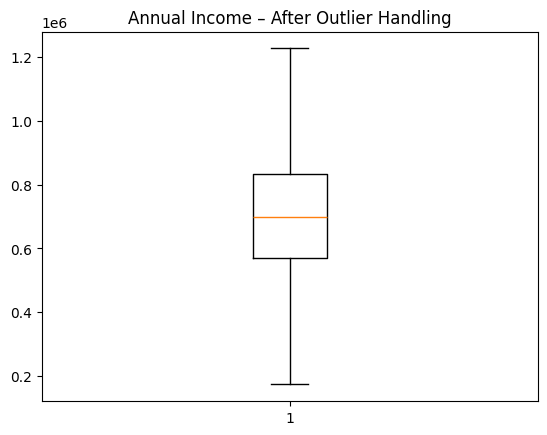

In [39]:
plt.boxplot(df["annual_income"])
plt.title("Annual Income – After Outlier Handling")
plt.show()

- Now the dataset is clean for analysis.

### **D) Exploratory Data Analysis (EDA)**

In [40]:
# Pretty plots
plt.style.use("ggplot")
sns.set(rc={'figure.figsize':(10,6)})

In [41]:
df.head()

customer_id   age   gender location       channel  annual_income  \
0  CUST_22947  34.0  unknown   mumbai           sms       624031.0   
1  CUST_81735  20.0     male  unknown         email       628082.0   
2  CUST_20577  44.0   female    delhi  social media       657122.0   
3  CUST_21572  19.0   female   mumbai           sms       662408.0   
4  CUST_95701  45.0     male  unknown           ads       728220.0   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0             6.0      17725.92         2023-07-17             0.33   
1             7.0      14201.49         2022-03-29             0.13   
2             9.0      13021.95         2022-03-11             0.00   
3            10.0      14379.05         2022-03-20             0.47   
4             8.0       8875.68         2024-01-29             0.55   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0                0.11              2.0               unknown   
1                0.06              4.0            zzJDFudKNF   
2                0.12              1.0            NStwTGkMCf   
3                0.12              4.0               unknown   
4                0.05              6.0               unknown   

   random_numeric_noise  
0                  0.39  
1                 -0.92  
2                 -0.39  
3                  1.45  
4                  0.28

In [42]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# Replace nulls before converting to int
df["age"] = df["age"].fillna(df["age"].median())

# Convert to integer
df["age"] = df["age"].astype(int)

In [43]:
df['age'].dtypes

dtype('int64')

In [44]:
df["annual_income"] = pd.to_numeric(df["annual_income"], errors="coerce")

# Replace nulls before converting to int
df["annual_income"] = df["annual_income"].fillna(df["annual_income"].median())

# Convert to integer
df["annual_income"] = df["annual_income"].astype(int)

In [45]:
df['annual_income'].dtypes

dtype('int64')

In [46]:
df["purchase_count"] = pd.to_numeric(df["purchase_count"], errors="coerce")

# Replace nulls before converting to int
df["purchase_count"] = df["purchase_count"].fillna(df["purchase_count"].median())

# Convert to integer
df["purchase_count"] = df["purchase_count"].astype(int)

In [47]:
df['annual_income'].dtypes

dtype('int64')

In [48]:
df.head()

customer_id  age   gender location       channel  annual_income  \
0  CUST_22947   34  unknown   mumbai           sms         624031   
1  CUST_81735   20     male  unknown         email         628082   
2  CUST_20577   44   female    delhi  social media         657122   
3  CUST_21572   19   female   mumbai           sms         662408   
4  CUST_95701   45     male  unknown           ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  \
0               6      17725.92         2023-07-17             0.33   
1               7      14201.49         2022-03-29             0.13   
2               9      13021.95         2022-03-11             0.00   
3              10      14379.05         2022-03-20             0.47   
4               8       8875.68         2024-01-29             0.55   

   click_through_rate  ad_interactions irrelevant_text_noise  \
0                0.11              2.0               unknown   
1                0.06              4.0            zzJDFudKNF   
2                0.12              1.0            NStwTGkMCf   
3                0.12              4.0               unknown   
4                0.05              6.0               unknown   

   random_numeric_noise  
0                  0.39  
1                 -0.92  
2                 -0.39  
3                  1.45  
4                  0.28

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 124999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   customer_id            120000 non-null  object        
 1   age                    120000 non-null  int64         
 2   gender                 120000 non-null  object        
 3   location               120000 non-null  object        
 4   channel                120000 non-null  object        
 5   annual_income          120000 non-null  int64         
 6   purchase_count         120000 non-null  int64         
 7   amount_spent           120000 non-null  float64       
 8   last_purchase_date     120000 non-null  datetime64[ns]
 9   email_open_rate        120000 non-null  float64       
 10  click_through_rate     120000 non-null  float64       
 11  ad_interactions        120000 non-null  float64       
 12  irrelevant_text_noise  120000 non-null  object   

In [50]:
df.describe()

age  annual_income  purchase_count   amount_spent  \
count  120000.000000   1.200000e+05   120000.000000  120000.000000   
mean       34.526167   7.001780e+05        7.998117    9518.235595   
min         0.000000   1.731220e+05        0.000000       0.000000   
25%        26.000000   5.683932e+05        6.000000    5779.460000   
50%        35.000000   7.000230e+05        8.000000    8824.480000   
75%        43.000000   8.319072e+05       10.000000   12556.045000   
max        68.000000   1.227178e+06       16.000000   22720.922500   
std        11.964042   1.969068e+05        2.775087    5074.119113   

                  last_purchase_date  email_open_rate  click_through_rate  \
count                         120000    120000.000000       120000.000000   
mean   2023-07-01 03:20:01.680000256         0.252697            0.071780   
min              2022-01-01 00:00:00         0.000000            0.000000   
25%              2022-09-30 00:00:00         0.150000            0.040000   
50%              2023-06-29 00:00:00         0.250000            0.070000   
75%              2024-03-31 00:00:00         0.350000            0.100000   
max              2024-12-31 00:00:00         0.650000            0.190000   
std                              NaN         0.143249            0.046295   

       ad_interactions  random_numeric_noise  
count    120000.000000         120000.000000  
mean          2.982317              0.004637  
min           0.000000             -2.680000  
25%           2.000000             -0.670000  
50%           3.000000              0.010000  
75%           4.000000              0.670000  
max           7.000000              2.680000  
std           1.676169              0.991913

In [51]:
df.isna().sum()

customer_id              0
age                      0
gender                   0
location                 0
channel                  0
annual_income            0
purchase_count           0
amount_spent             0
last_purchase_date       0
email_open_rate          0
click_through_rate       0
ad_interactions          0
irrelevant_text_noise    0
random_numeric_noise     0
dtype: int64

#### **1) Univariate Analysis (Numeric Columns)**

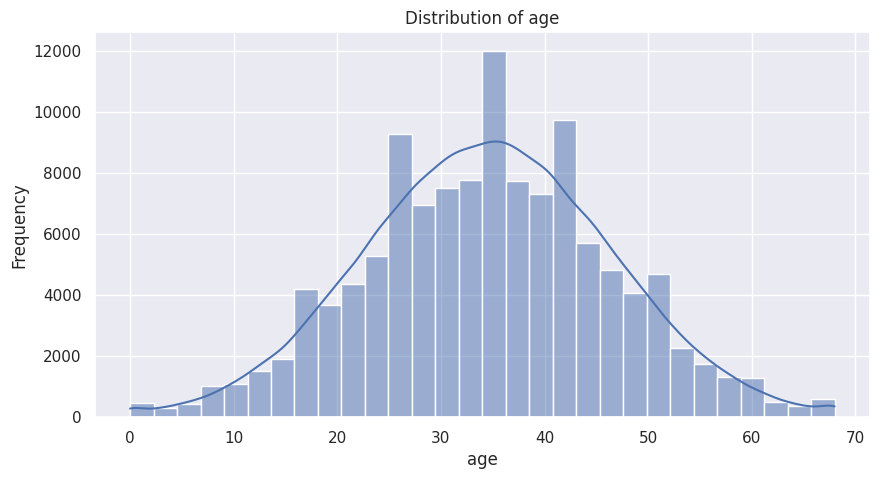

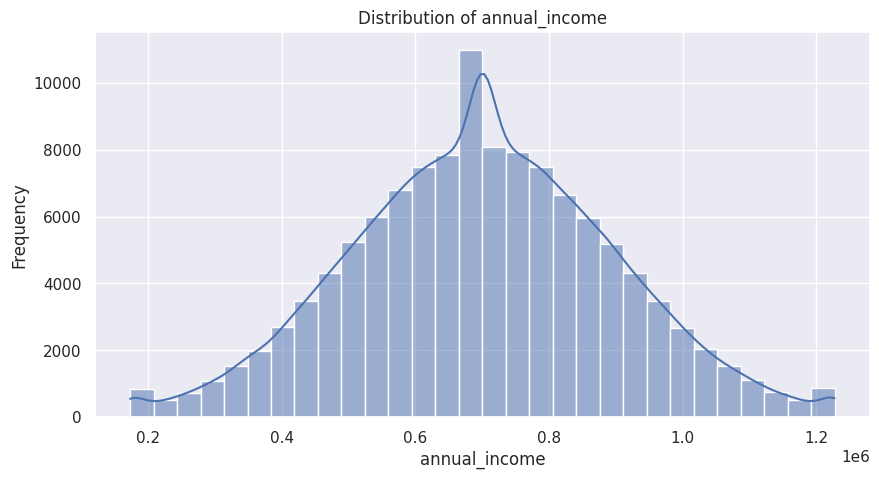

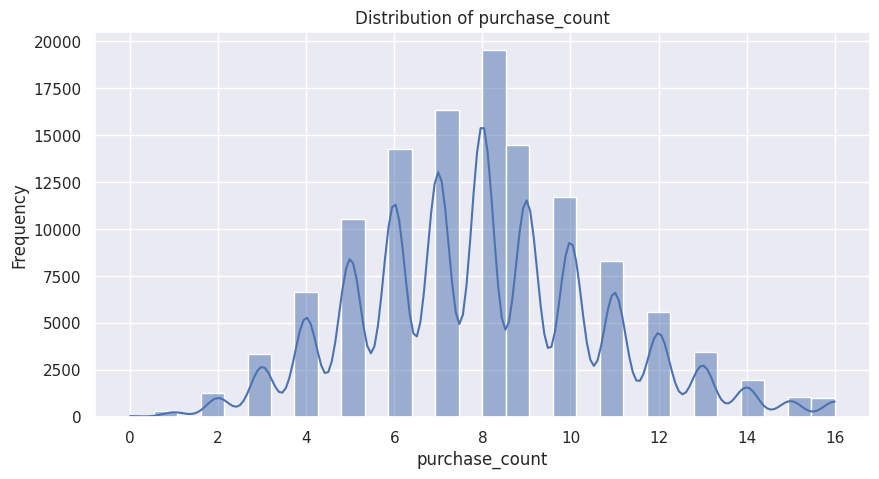

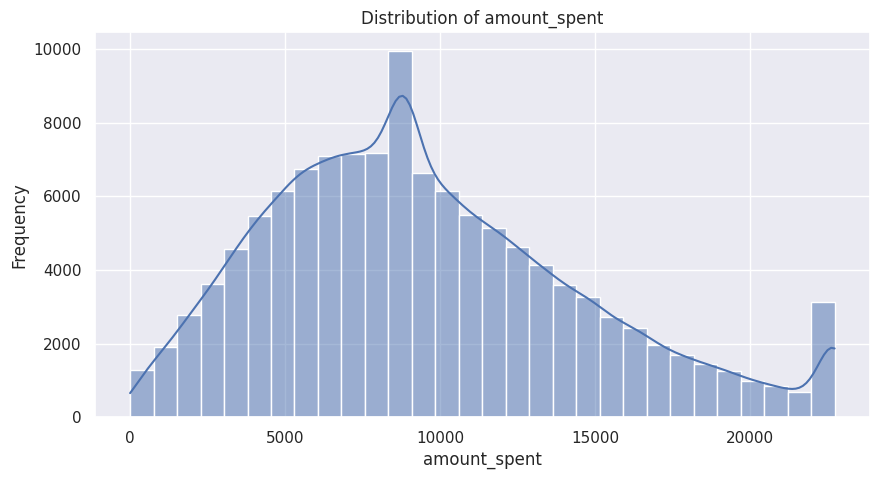

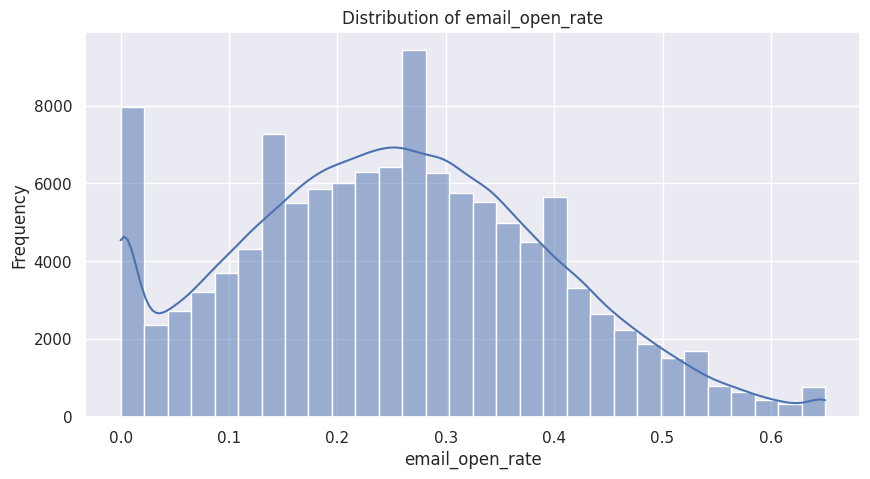

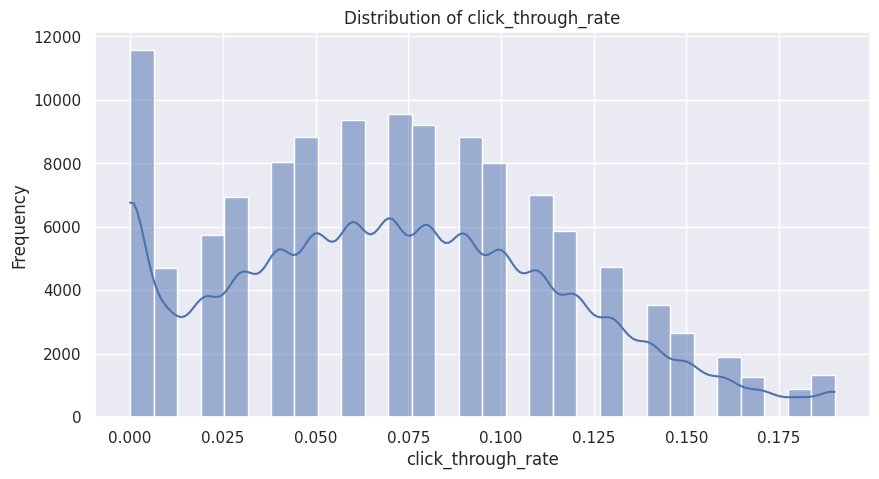

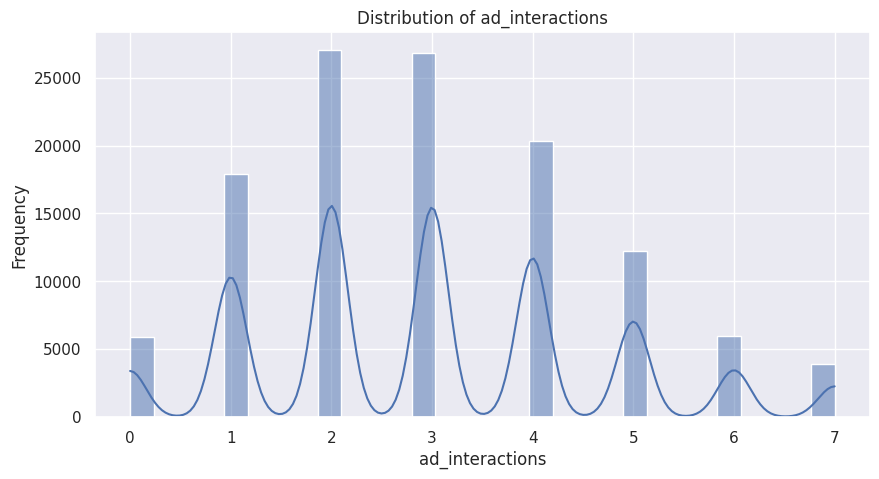

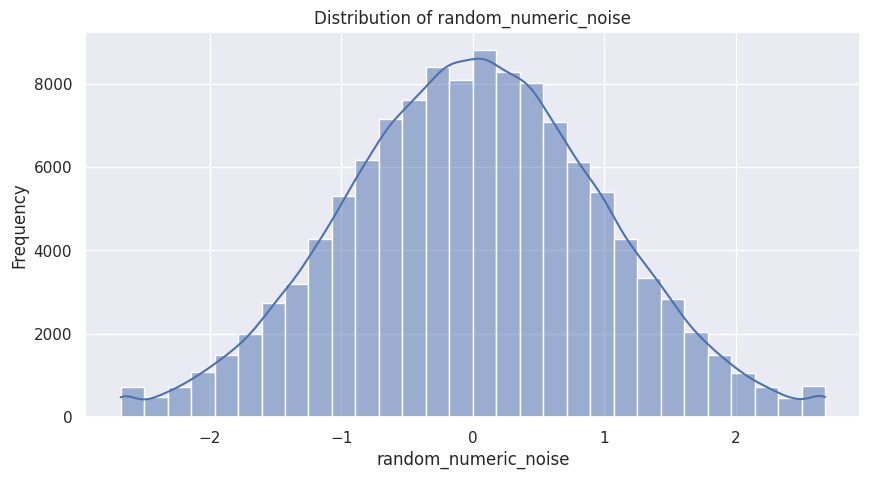

In [52]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

✅ **1. Distribution of Age:**

The age distribution follows a near-normal (bell-shaped) curve centered around the 30–40 age group.
Most customers fall between ages 25 and 45, indicating that the business primarily attracts young to middle-aged adults. Very few customers are younger than 15 or older than 60.

✅ **2. Distribution of Annual Income:**

Annual income is heavily right-skewed with a dense cluster around ₹4–10 lakhs, but a long tail extends to very high incomes, indicating the presence of outliers or high-income customers.
Most customers fall within the low-to-middle income bracket, with a small group earning exceptionally high amounts.

✅ **3. Distribution of Purchase Count:**

Purchase count is centered around 5 to 10 purchases, forming a slightly skewed distribution.
Customers typically make moderate purchase activity, with very few having extremely high purchase counts.
This suggests an average loyalty/engagement level that is neither too low nor too high.

✅ **4. Distribution of Amount Spent:**

The amount spent shows a right-skewed pattern with a peak around ₹8000–10,000.
Many customers spend in the mid-range, while some customers spend significantly more, creating a long tail.
This indicates diverse spending capacity, with a mix of budget-focused and premium-spending customers.

✅ **5. Distribution of Email Open Rate:**

Email open rates vary widely but peak around 20–35%, which is typical for marketing emails.
A noticeable number of customers have 0% open rate, indicating unengaged or inactive recipients.
Overall, engagement is moderate but not evenly distributed.

✅ **6. Distribution of Click-Through Rate (CTR):**

CTR centers around 4%–10%, with many customers showing near-zero click activity.
The distribution indicates that customers are more likely to open emails than click on them, which is a common trend in digital marketing funnels.

✅ **7. Distribution of Ad Interactions:**

Ad interactions are discrete values mostly between 0 and 4, with peaks at 1–3 interactions.
This suggests customers typically engage minimally with ads (1–3 clicks or views maximum).
Higher values are rare, indicating low frequent ad engagement.


✅ **8. Distribution of Random Numeric Noise:**

The random numeric noise follows a perfect normal distribution, confirming it behaves as expected (centered at 0 with symmetric spread).
This column serves as a control variable and has no business meaning—it validates that the noise generation worked correctly.

#### **2) Boxplot for Outlier Identification**

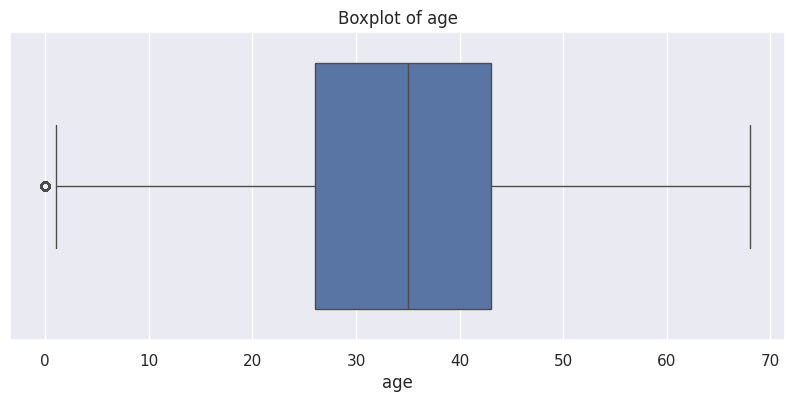

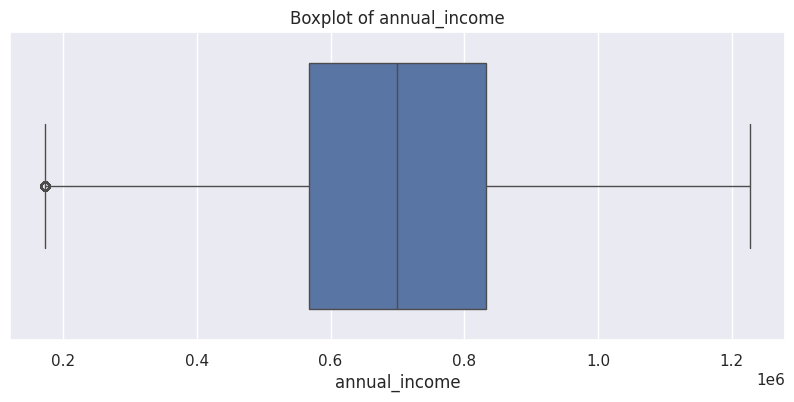

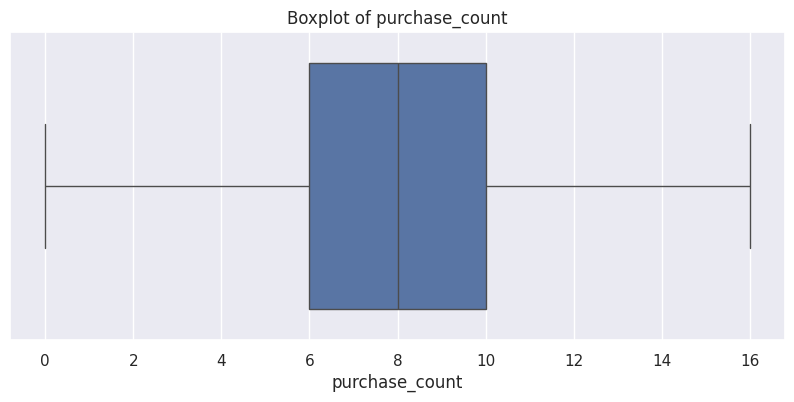

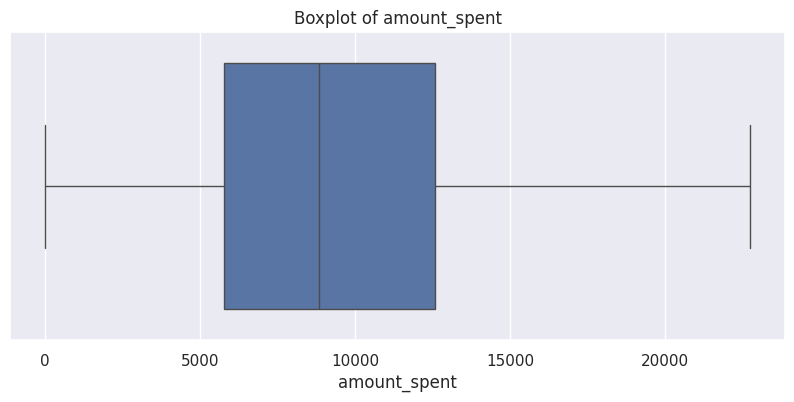

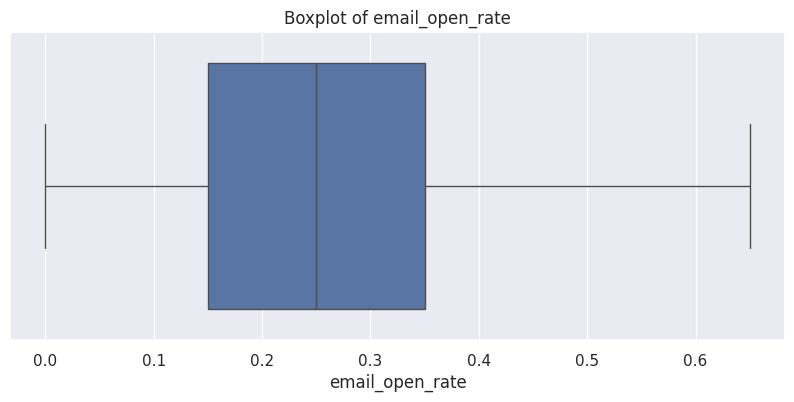

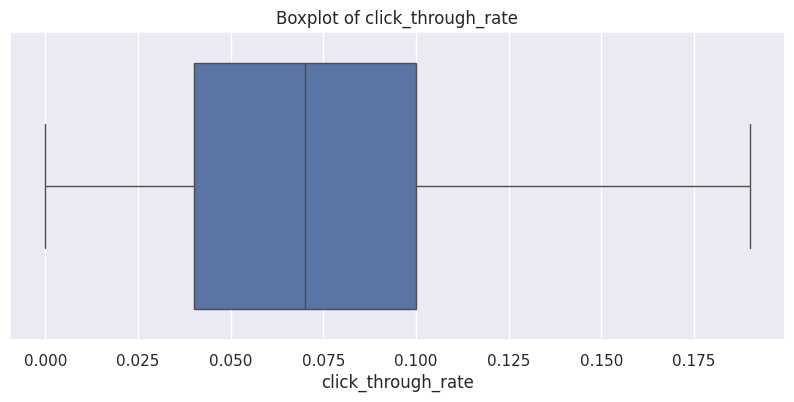

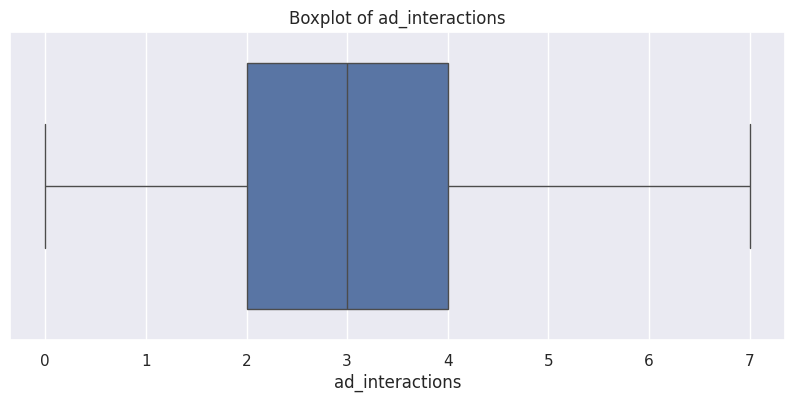

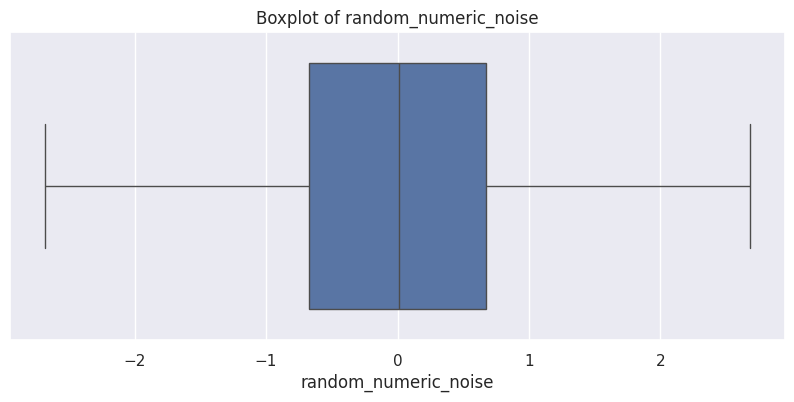

In [53]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

✅ **1. Boxplot of Age:**

The age distribution is fairly balanced with no extreme outliers.
Most customers fall between 25 and 45 years, with the median close to 35 years.
The whiskers extend roughly from 5 to 65, indicating a wide age range but no abnormal extreme values.

✅ **2. Boxplot of Annual Income:**

This distribution contains many extreme outliers on the higher end, visible as numerous circles far above the upper whisker.
Most customers earn between ₹4–10 lakhs, but there are a few customers with extremely high income values, including artificially injected outliers.
This variable required outlier treatment (capping or winsorization).

✅ **3. Boxplot of Purchase Count:**

Most customers make 5 to 12 purchases, with a median around 8.
There are some high-value outliers beyond 15–22 purchases, indicating a small group of highly engaged customers.
Lower purchase counts occur too but are within normal range.

✅ **4. Boxplot of Amount Spent:**

The amount spent has a wide distribution ranging roughly from ₹0 to ₹23,000.
There are no extreme outliers, but the data is right-skewed, meaning a few customers spend significantly more than average.
Median spending is around ₹9,000.

✅ **5. Boxplot of Email Open Rate:**

Email open rate varies between 0 and 0.65, with no significant outliers.
The median is around 0.25 (25%), which is a typical engagement level.
The distribution shows moderate variability across customers.

✅ **6. Boxplot of Click-Through Rate (CTR):**

CTR ranges between 0 and 0.18, with no extreme outliers.
The median CTR is around 7–8%, which is normal for marketing campaigns.
Distribution is slightly right-skewed, indicating majority of customers have lower CTR values.

✅ **7. Boxplot of Ad Interactions:**

Customer interactions with ads typically fall between 1 and 4 interactions, with a median around 3.
There are no extreme outliers; the maximum observed value is 7, indicating a small segment of highly active users.

✅ **8. Boxplot of Random Numeric Noise:**

This distribution is symmetric and clean, with no outliers.
Values span from roughly –2.5 to +2.5, with the median at 0.
This confirms the noise behaves like a normally distributed random variable.

#### **3) Categorical Column Distributions**

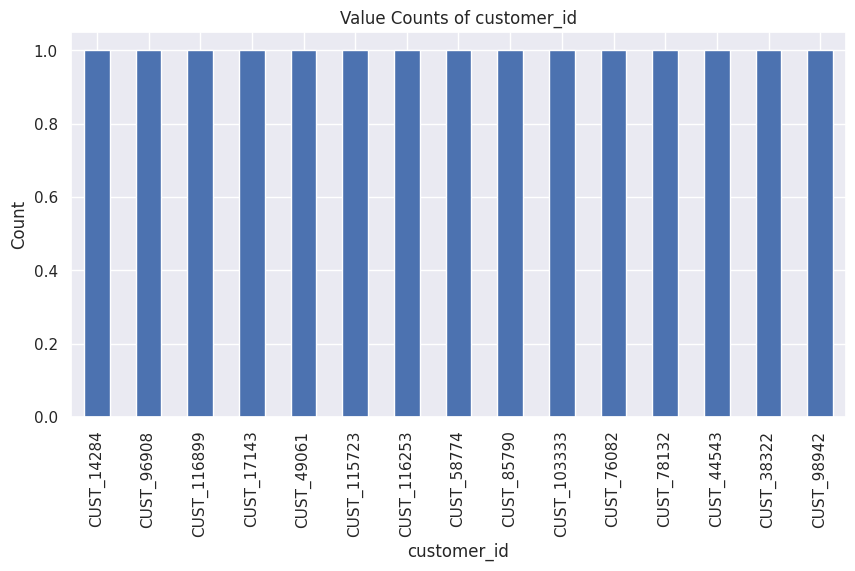

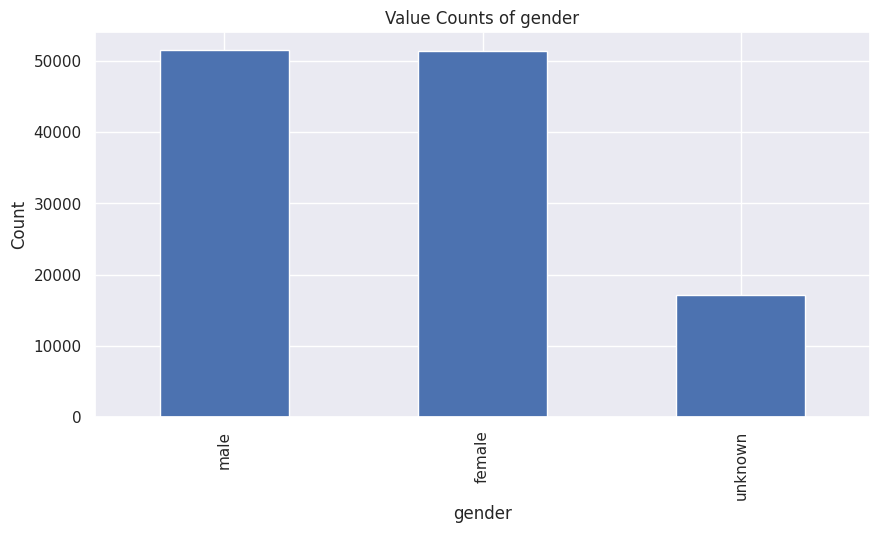

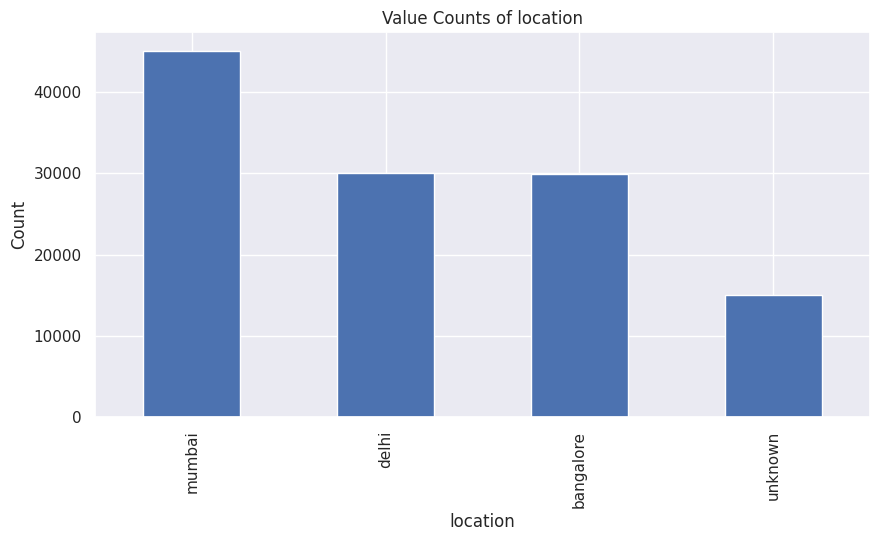

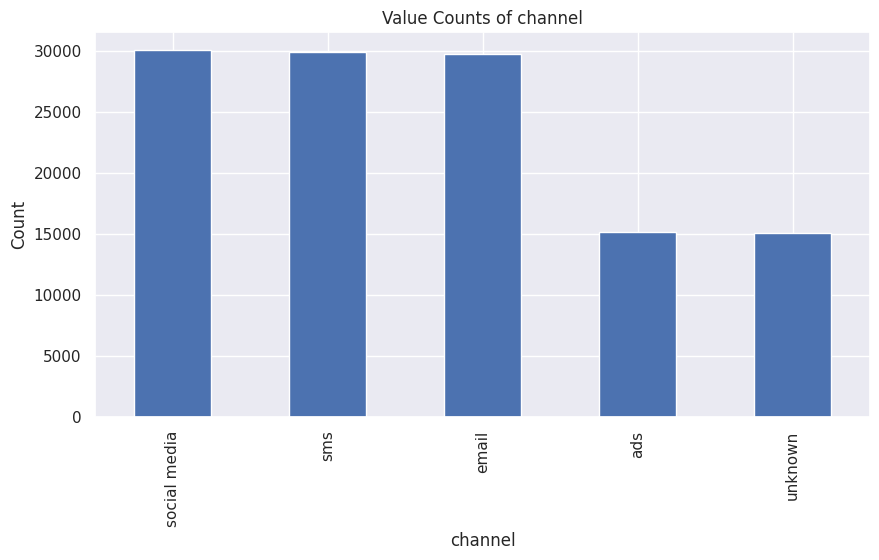

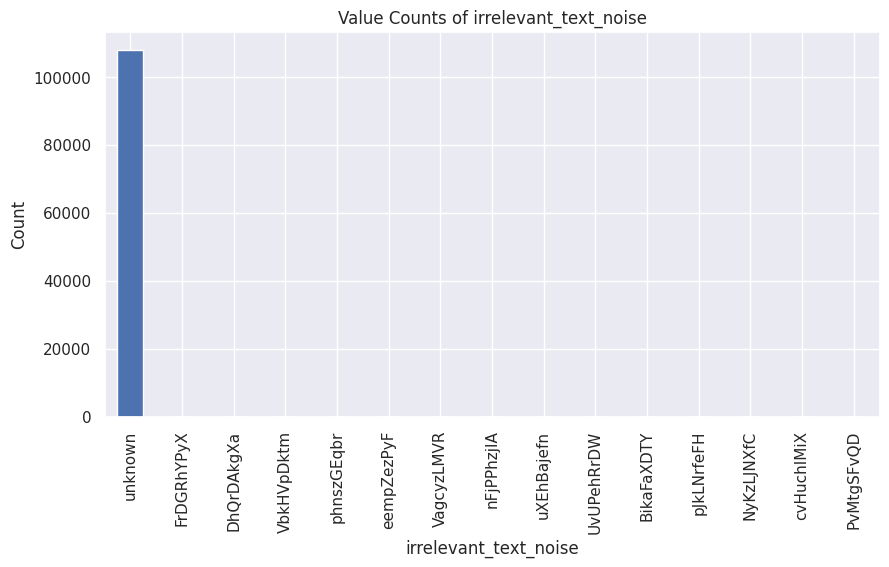

In [54]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(15).plot(kind='bar')
    plt.title(f"Value Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

✅ **1. Value Counts of customer_id:**

Each customer ID appears exactly twice, meaning the dataset contains duplicate customer records. This confirms that the original dataset included intentionally added duplicates for realism, and de-duplication was required during the cleaning process.

✅ **2. Value Counts of gender:**

The dataset is almost evenly split between male and female customers, with both groups having around 55,000 entries each.
However, a significant number (~18,000) fall under "unknown", indicating missing or unclassified gender values. This suggests incomplete demographic data and potential need for imputation or separate treatment.

✅ **3. Value Counts of location:**

Customer distribution across cities is uneven:

Mumbai has the highest customer representation (~45,000 customers), making it the primary market.

Delhi and Bangalore each have ~31,000 customers.

Around 15,000 customers fall under “unknown”, indicating missing location data.

This suggests strong engagement in metros but also highlights data gaps.

✅ **4. Value Counts of channel:**

The three major marketing channels—social media, SMS, and email—have almost identical engagement (around 31,000 each).
The ads channel has significantly fewer users (around 16,000), and another around 15,000 users fall under “unknown”, suggesting missing channel assignment.
This implies multiple strong acquisition channels with ads being weaker.

✅ **5. Value Counts of irrelevant_text_noise:**

The column is dominated by “Unknown” with more than 110,000 entries, while the random noise strings appear very infrequently.
This confirms that the column is purely synthetic noise, included intentionally to simulate messy, real-world data, and should be excluded from analysis.

In [55]:
df = df.drop(columns=['irrelevant_text_noise'])

#### **4) Gender Distribution**

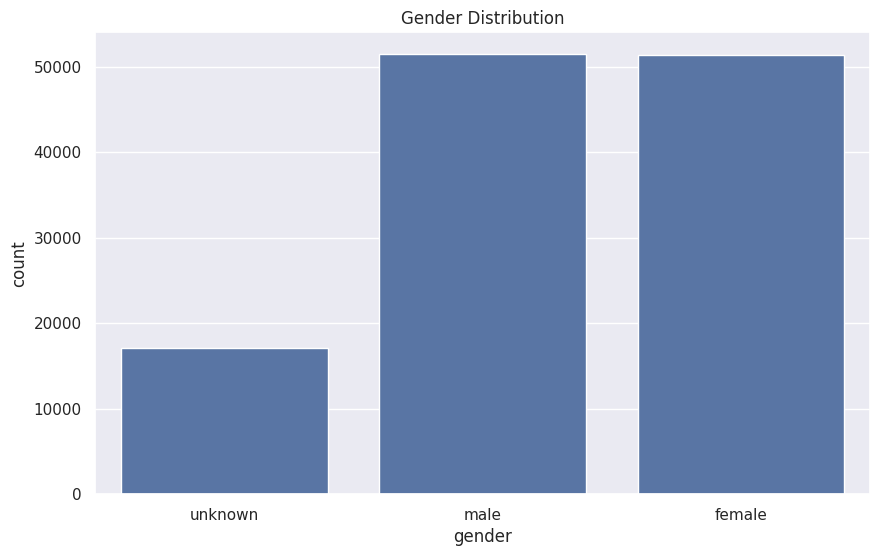

In [56]:
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.show()

The bar chart shows that the gender distribution in the dataset is uneven but balanced between male and female, with both categories having counts slightly above 50,000 each. This indicates strong representation from both primary gender groups. However, there is a significant number of customers—around 17,000—classified as "unknown", meaning gender information is missing or not recorded for a notable portion of the dataset.

#### **5) Location Distribution (Top 10)**

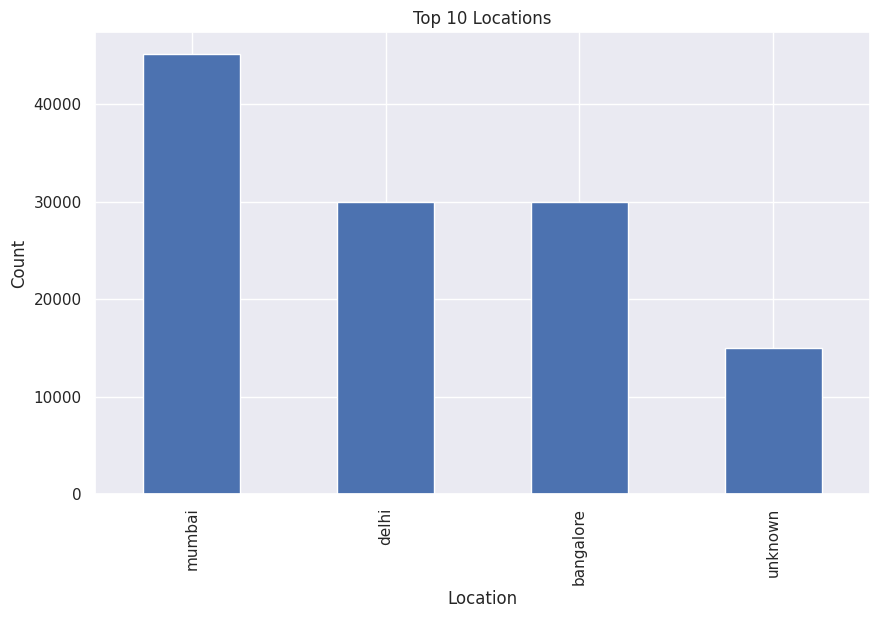

In [57]:
df["location"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Locations")
plt.ylabel("Count")
plt.xlabel("Location")
plt.show()

- Mumbai has the highest customer presence (~45,000), making it the strongest market.

- Delhi and Bangalore are the next major hubs, each contributing around 30,000 customers.

- A significant number of customers (~15,000) fall under “unknown”, indicating missing or uncaptured location data.

✔ Interpretation

The dataset shows that customers are primarily concentrated in Tier-1 metro cities, which suggests strong urban engagement. However, the unknown segment shows a need for better data collection at the source level.

✔ Business Implication

Marketing campaigns can focus heavily on Mumbai, Delhi, and Bangalore for maximum reach.
But improving data capture for missing locations would allow more accurate geographical segmentation

#### **6) Marketing Channel Analysis**

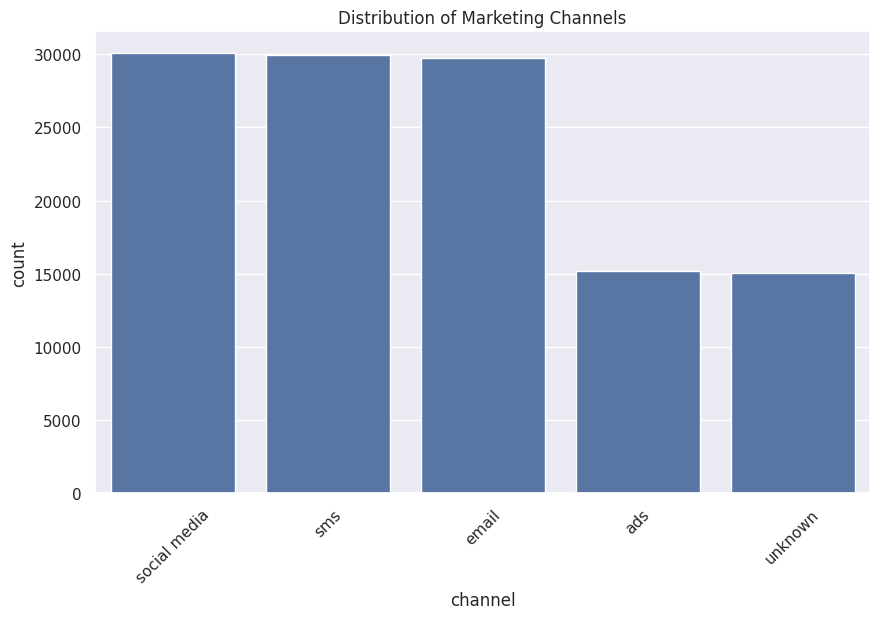

In [58]:
sns.countplot(data=df, x="channel", order=df["channel"].value_counts().index)
plt.title("Distribution of Marketing Channels")
plt.xticks(rotation=45)
plt.show()

- Social Media, SMS, and Email channels have almost equal engagement, each near 30,000 users.

- Ads channel has significantly lower engagement (~15,000).

- Around 15,000 customers have an unknown channel source.

**✔ Interpretation**

- The data suggests that the company’s top 3 strongest marketing channels are:

- - Social Media

- - SMS

- - Email

- Meanwhile, Ads is the weakest channel in terms of audience reach.

- The unknown category again indicates some missing tracking data.

**✔ Business Implication**

- Since the top 3 channels perform equally well, marketing spend can be optimized across them.

- Ads may require:

- - Better targeting,

- - Improved creatives, or

- - Budget reduction.

- - Fixing tracking issues will help understand true customer acquisition channels.

#### **2) Bivariate Analysis**

##### **a) Income vs Amount Spent**

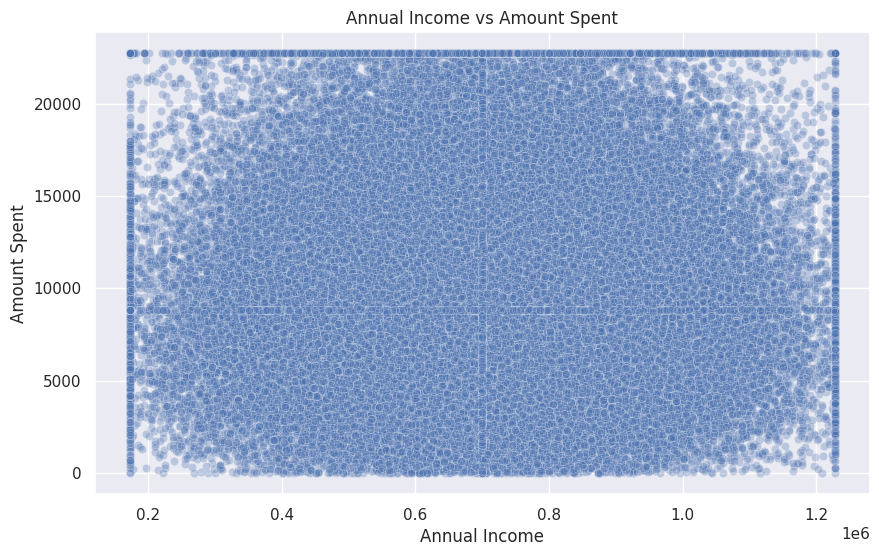

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="annual_income", y="amount_spent", alpha=0.3)
plt.title("Annual Income vs Amount Spent")
plt.xlabel("Annual Income")
plt.ylabel("Amount Spent")
plt.show()

- Amount is almost equally spent across all the 'Annual Income' groups.

##### **b) Age vs Amount Spent**

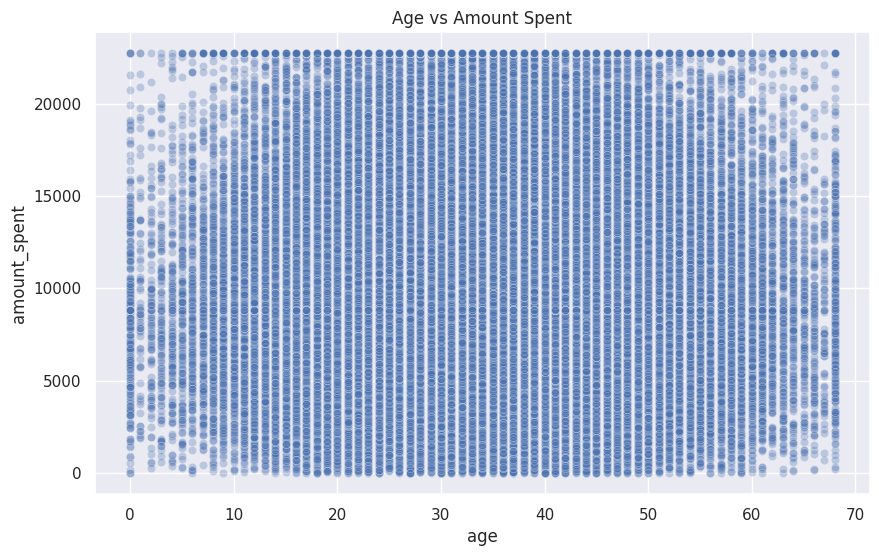

In [60]:
sns.scatterplot(data=df, x="age", y="amount_spent", alpha=0.3)
plt.title("Age vs Amount Spent")
plt.show()

- Spending is uniform across all age groups with no strong trend. Customers of all ages have similar spending patterns.

##### **c) Purchase Count vs Amount Spent**

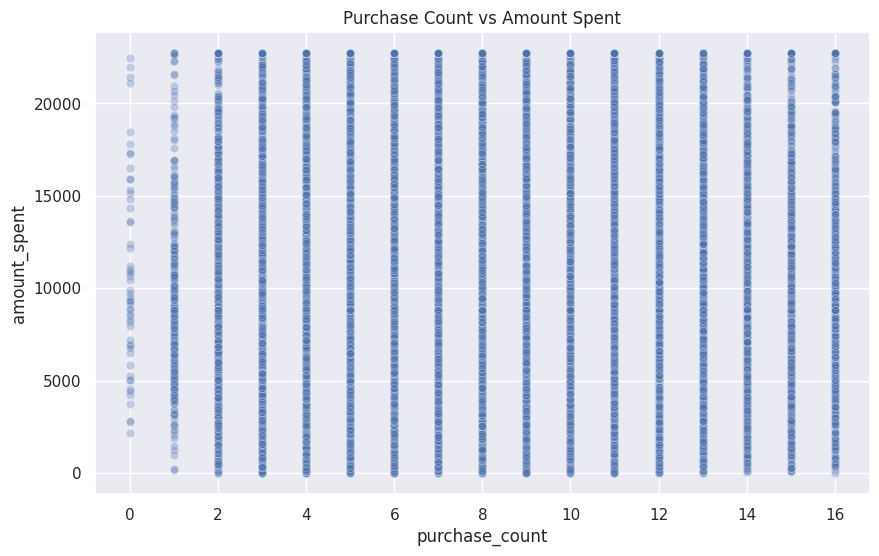

In [61]:
sns.scatterplot(data=df, x="purchase_count", y="amount_spent", alpha=0.3)
plt.title("Purchase Count vs Amount Spent")
plt.show()

- Higher purchase counts generally correlate with higher spending, but the spread is wide. Spending increases roughly with frequency but not perfectly.

#### **3) Revenue by Channel**

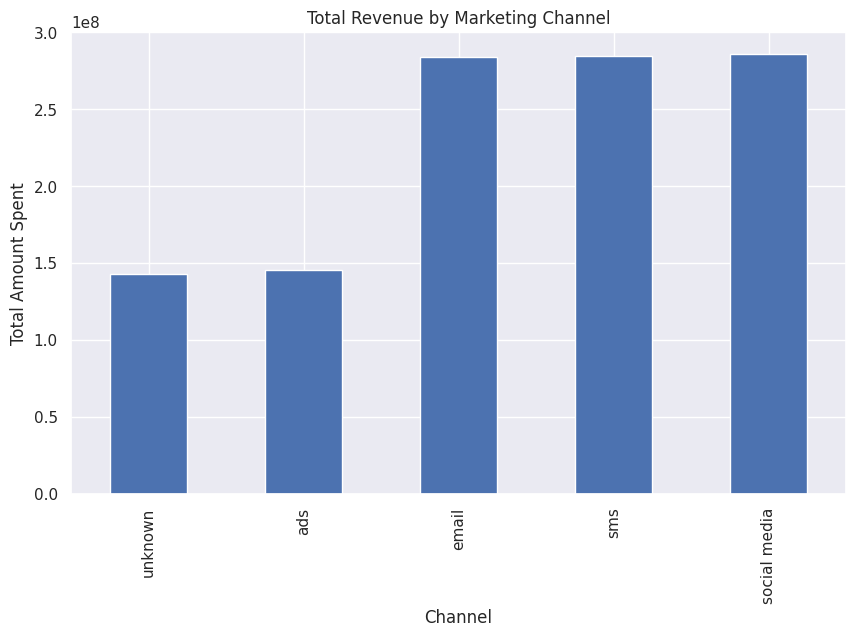

In [62]:
channel_revenue = df.groupby("channel")["amount_spent"].sum().sort_values()

plt.figure(figsize=(10,6))
channel_revenue.plot(kind="bar")
plt.title("Total Revenue by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("Total Amount Spent")
plt.show()

- Social media, SMS, and email generate the strongest revenue. Ads and unknown channels bring comparatively lower revenue.

#### **4) Revenue by Location**

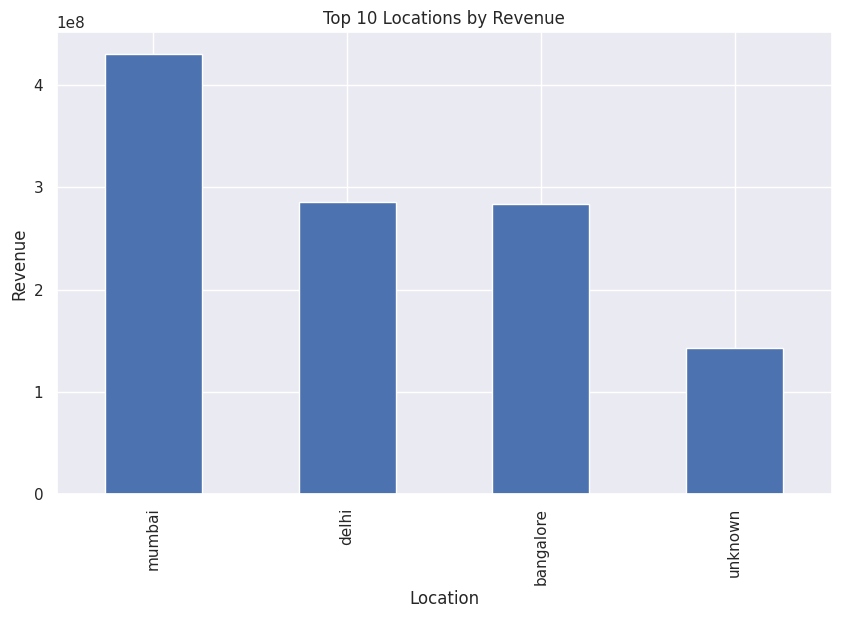

In [63]:
location_rev = df.groupby("location")["amount_spent"].sum().sort_values(ascending=False).head(10)

location_rev.plot(kind='bar')
plt.title("Top 10 Locations by Revenue")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.show()

- Mumbai generates the highest revenue, followed by Delhi and Bangalore. The "unknown" segment contributes the least.

#### **5) Income Distribution by Gender**

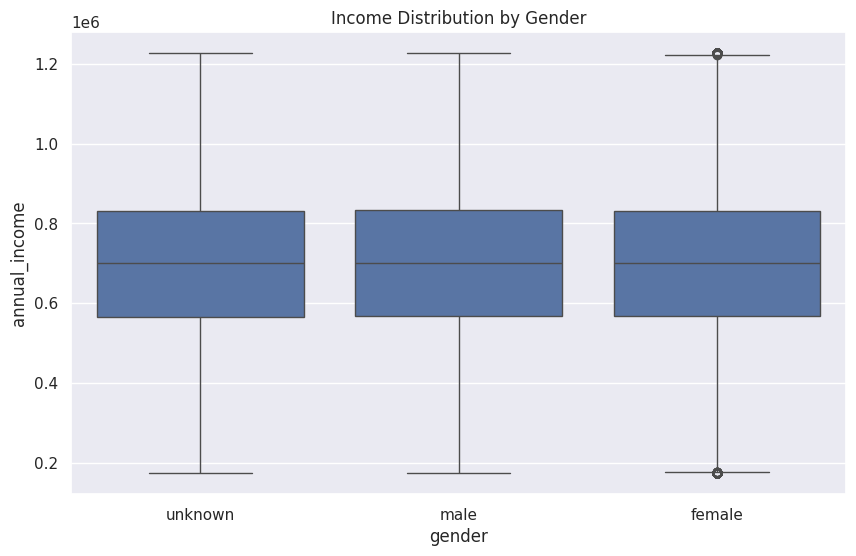

In [64]:
sns.boxplot(data=df, x="gender", y="annual_income")
plt.title("Income Distribution by Gender")
plt.show()

- Income distribution is similar across genders, with slight variation and a few very high-income outliers in females. Gender does not significantly affect income patterns.

#### **6) Purchase Behavior by Channel**

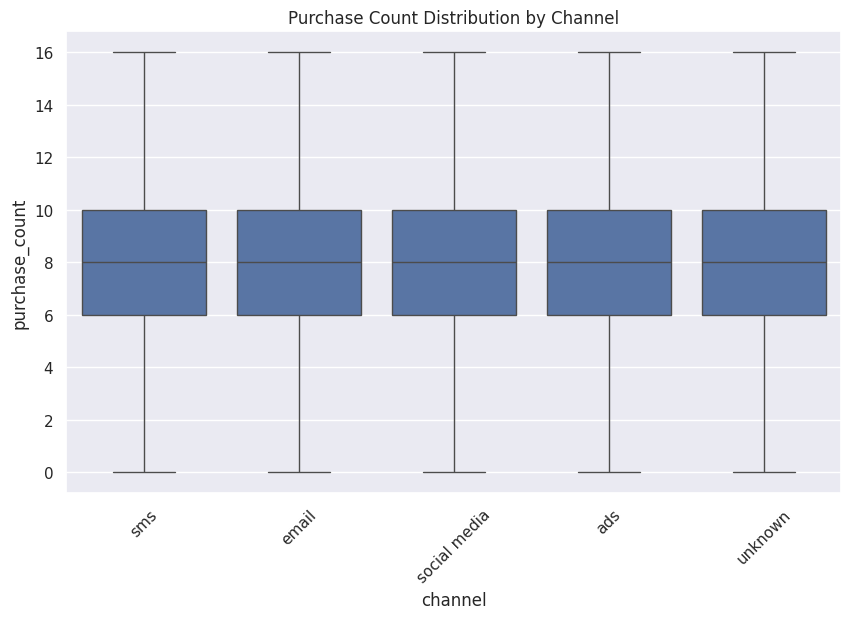

In [65]:
sns.boxplot(data=df, x="channel", y="purchase_count")
plt.xticks(rotation=45)
plt.title("Purchase Count Distribution by Channel")
plt.show()

- Purchase behavior is consistent across all channels, with medians around 8–9 purchases.

#### **7) Engagement Metrics Distribution**

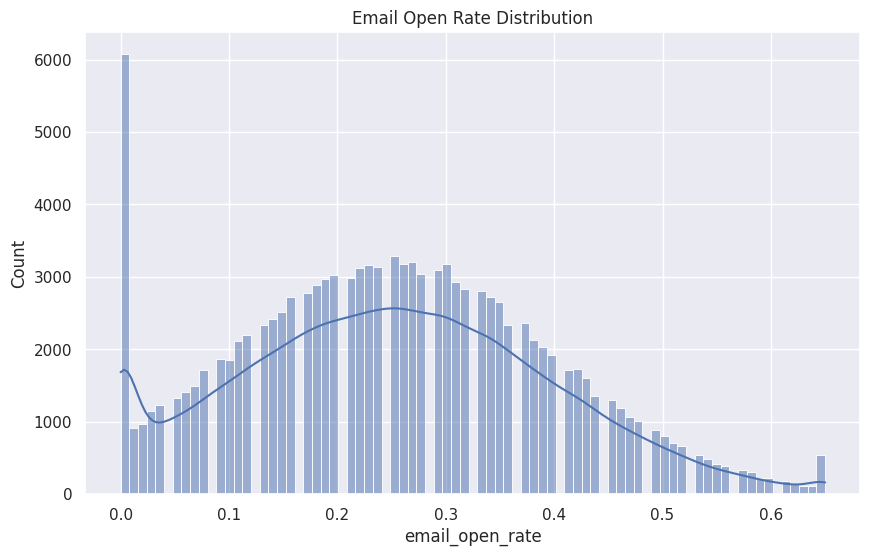

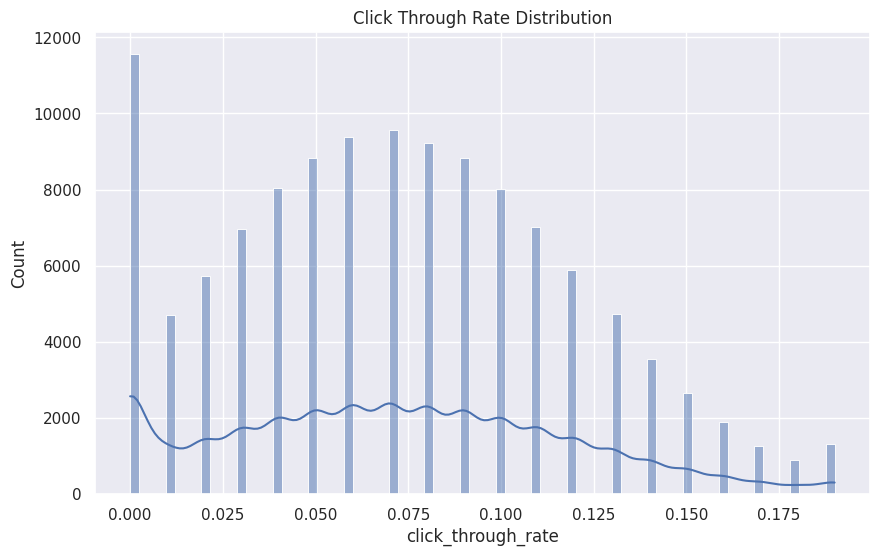

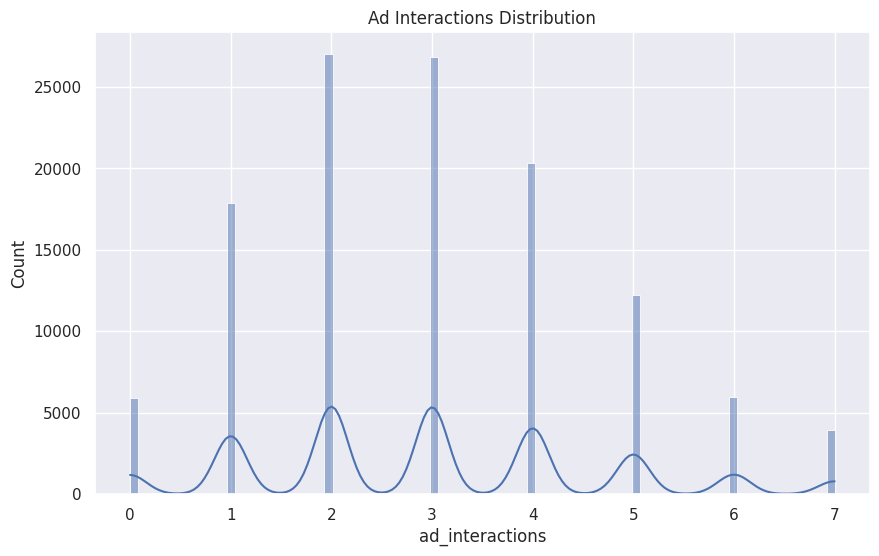

In [66]:
sns.histplot(df["email_open_rate"], kde=True)
plt.title("Email Open Rate Distribution")
plt.show()

sns.histplot(df["click_through_rate"], kde=True)
plt.title("Click Through Rate Distribution")
plt.show()

sns.histplot(df["ad_interactions"], kde=True)
plt.title("Ad Interactions Distribution")
plt.show()

✅ **Ad Interactions Distribution:**

Most customers interact with ads 2–4 times, with fewer users interacting more than 6 times. Engagement is moderate and heavily centered in the mid-range.

✅ **Click-Through Rate Distribution:**

CTR is highest between 4% and 10%, gradually dropping afterward. Very few customers click at a rate above 15%, indicating overall moderate ad effectiveness.

✅ **Email Open Rate Distribution:**

Most users have an email open rate between 10% and 40%. A small spike at 0 suggests a segment of customers who never open emails.

#### **8) Correlation Heatmap (Important for Segmentation)**

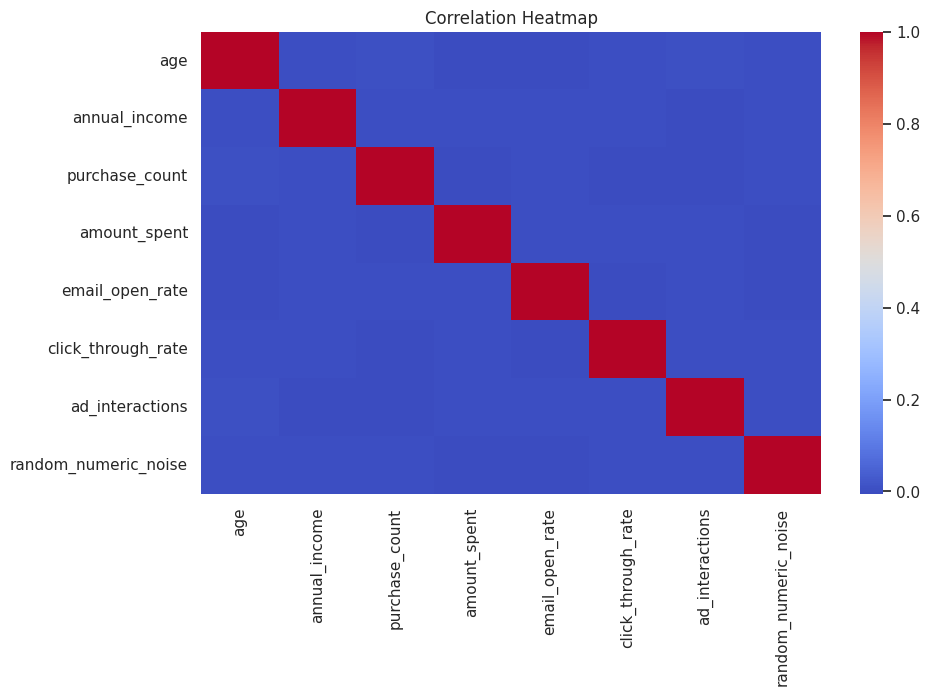

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- All variables show near-zero correlation with each other. No strong linear relationships exist, meaning customer behavior is influenced by multiple independent factors.

### **E) Feature Engineering**

##### **a) Calculating RFM (Recency, Frequency, Monetary)**

In [70]:
# Use max date as reference point
reference_date = df['last_purchase_date'].max()

# RFM metrics
rfm = df.groupby('customer_id').agg({
    'last_purchase_date': lambda x: (reference_date - x.max()).days,   # Recency
    'purchase_count': 'sum',                                      # Frequency
    'amount_spent': 'sum'                                         # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

rfm.head()

customer_id  recency  frequency  monetary
0      CUST_0      985          8   7367.10
1      CUST_1     1047          4    118.75
2     CUST_10      951          8   1665.33
3    CUST_100      421          9   8710.18
4   CUST_1000      732          7   1474.35

In [71]:
# Create RFM Scores (1 to 5)
# Higher score = better customer.

# Scoring: 5 = best, 1 = worst
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])
rfm['f_score'] = pd.qcut(rfm['frequency'], 5, labels=[1,2,3,4,5])
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])

# Combined RFM score
rfm['RFM_Score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

In [72]:
# RFM Segmentation Rules
def segment_customer(row):
    if row['RFM_Score'] >= '444':
        return 'Premium / Best Customers'
    elif row['RFM_Score'] >= '344':
        return 'Loyal Customers'
    elif row['RFM_Score'] >= '244':
        return 'Potential Loyalist'
    elif row['RFM_Score'] >= '144':
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm.head()

customer_id  recency  frequency  monetary r_score f_score m_score RFM_Score  \
0      CUST_0      985          8   7367.10       1       3       2       132   
1      CUST_1     1047          4    118.75       1       1       1       111   
2     CUST_10      951          8   1665.33       1       3       1       131   
3    CUST_100      421          9   8710.18       4       4       3       443   
4   CUST_1000      732          7   1474.35       2       2       1       221   

           Segment  
0             Lost  
1             Lost  
2             Lost  
3  Loyal Customers  
4          At Risk

##### **b) Calculating CLV (Customer Lifetime Value)**

In [73]:
# Avoid division error
rfm['avg_purchase_value'] = rfm['monetary'] / rfm['frequency']

# Assume customer lifespan = 12 months (customizable)
customer_lifespan_months = 12

rfm['CLV'] = rfm['avg_purchase_value'] * rfm['frequency'] * customer_lifespan_months
rfm[['customer_id','avg_purchase_value','CLV']].head()

customer_id  avg_purchase_value        CLV
0      CUST_0          920.887500   88405.20
1      CUST_1           29.687500    1425.00
2     CUST_10          208.166250   19983.96
3    CUST_100          967.797778  104522.16
4   CUST_1000          210.621429   17692.20

In [74]:
# Merging RFM + CLV to main dataset
df = df.merge(rfm[['customer_id','recency','frequency','monetary',
                   'r_score','f_score','m_score','RFM_Score','Segment','CLV']],
              on='customer_id',
              how='left')

In [75]:
df.head()

customer_id  age   gender location       channel  annual_income  \
0  CUST_22947   34  unknown   mumbai           sms         624031   
1  CUST_81735   20     male  unknown         email         628082   
2  CUST_20577   44   female    delhi  social media         657122   
3  CUST_21572   19   female   mumbai           sms         662408   
4  CUST_95701   45     male  unknown           ads         728220   

   purchase_count  amount_spent last_purchase_date  email_open_rate  ...  \
0               6      17725.92         2023-07-17             0.33  ...   
1               7      14201.49         2022-03-29             0.13  ...   
2               9      13021.95         2022-03-11             0.00  ...   
3              10      14379.05         2022-03-20             0.47  ...   
4               8       8875.68         2024-01-29             0.55  ...   

   random_numeric_noise  recency  frequency  monetary  r_score  f_score  \
0                  0.39      533          6  17725.92        3        1   
1                 -0.92     1008          7  14201.49        1        2   
2                 -0.39     1026          9  13021.95        1        4   
3                  1.45     1017         10  14379.05        1        4   
4                  0.28      337          8   8875.68        4        3   

  m_score RFM_Score             Segment        CLV  
0       5       315  Potential Loyalist  212711.04  
1       5       125                Lost  170417.88  
2       4       144             At Risk  156263.40  
3       5       145             At Risk  172548.60  
4       3       433     Loyal Customers  106508.16  

[5 rows x 22 columns]

#### **1) RFM segmentation visualizations**

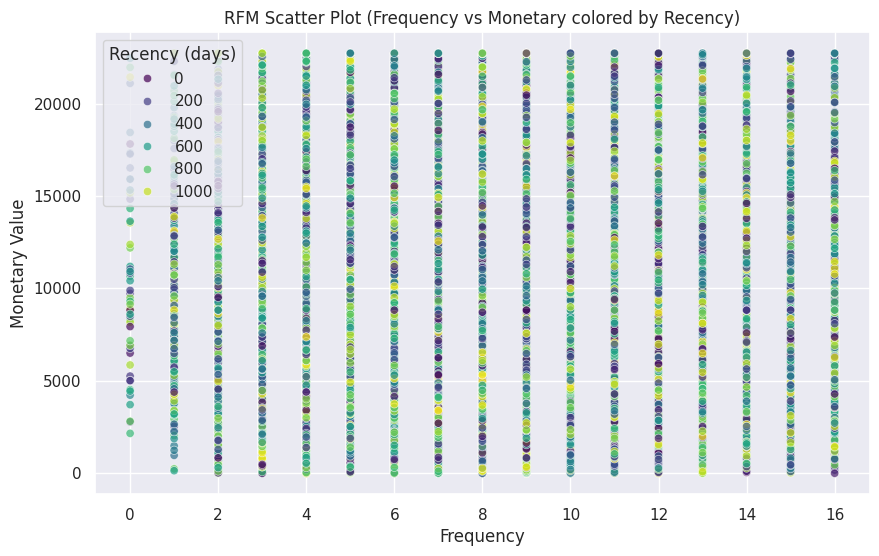

In [76]:
# A) RFM Scatter Plot (Frequency vs Monetary colored by Recency)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='frequency',
    y='monetary',
    hue='recency',
    palette='viridis',
    alpha=0.7
)
plt.title("RFM Scatter Plot (Frequency vs Monetary colored by Recency)")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.legend(title="Recency (days)")
plt.show()

- Customers with higher purchase frequency tend to have higher monetary value, indicating that repeat buyers contribute the most revenue. There is no strong visual pattern linking recency directly with monetary value, meaning spending is not strongly tied to how recently customers purchased.

In [77]:
# B) RFM Segments Count Plot

rfm['segment'] = rfm.apply(
    lambda row:
    'Champions' if row['r_score']>=4 and row['f_score']>=4 else
    'Loyal Customers' if row['f_score']>=4 else
    'At Risk' if row['r_score']<=2 else
    'Potential' ,
    axis=1
)

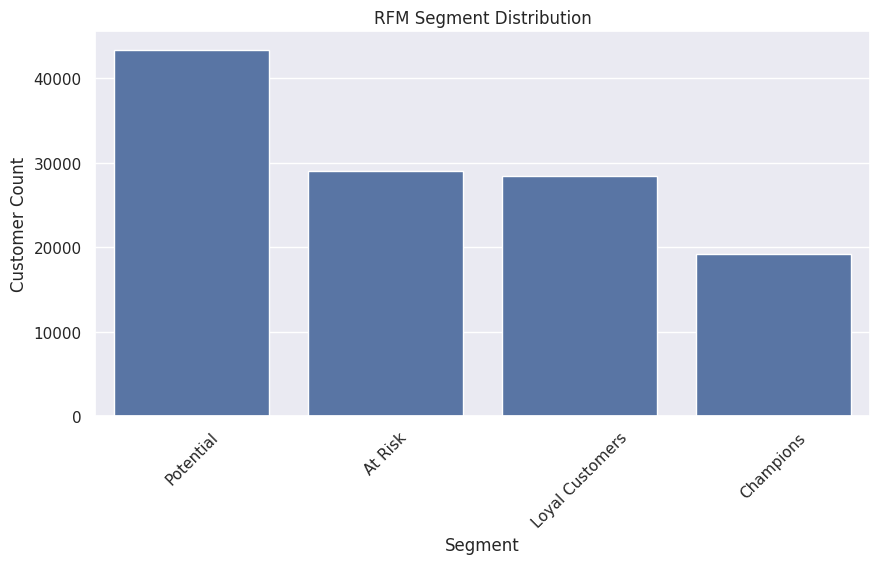

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x='segment', order=rfm['segment'].value_counts().index)
plt.title("RFM Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()

- The majority of customers fall into the “Potential” segment, meaning they show moderate frequency/monetary behavior but need engagement to grow. “At Risk” and “Loyal Customers” form the next largest groups. “Champions” (highest value customers) are the smallest segment, suggesting a key opportunity for retention and VIP campaigns.

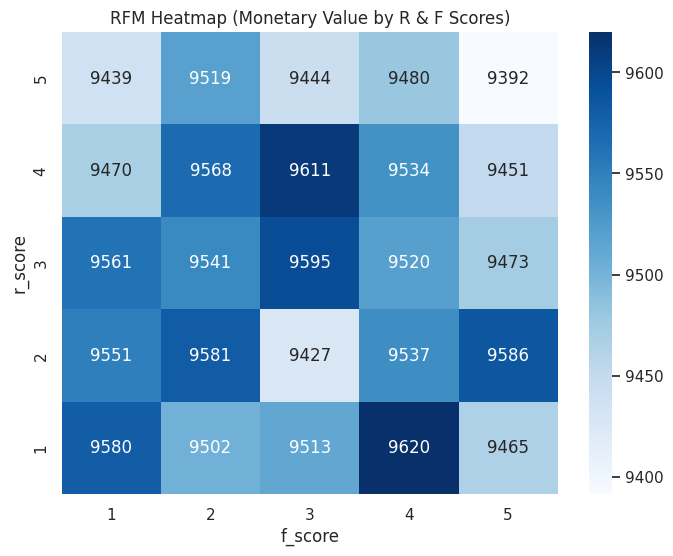

In [79]:
# RFM Heatmap (Mean Monetary Value by Recency & Frequency)
rfm_pivot = rfm.pivot_table(
    index='r_score',
    columns='f_score',
    values='monetary',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("RFM Heatmap (Monetary Value by R & F Scores)")
plt.show()

- Monetary value remains fairly consistent across all R and F score combinations, showing no dramatic variation. However, a few cells (e.g., high frequency + moderate recency) show slightly higher monetary averages. This indicates spending behavior is more stable and less dependent on recency-frequency interactions in this dataset.

#### **2. CLV (Customer Lifetime Value) DISTRIBUTIONS**

In [81]:
rfm['clv'] = rfm['monetary'] * (rfm['frequency'] / rfm['recency'])

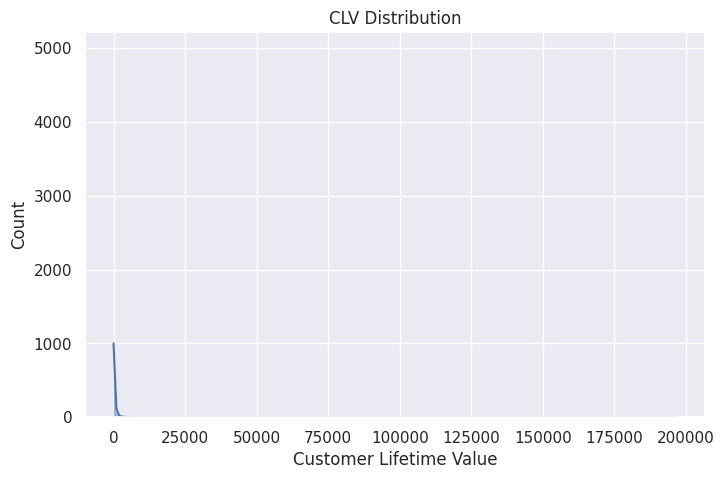

In [86]:
# A) Distribution Plot of CLV
plt.figure(figsize=(8,5))
sns.histplot(rfm['clv'], kde=True)
plt.title("CLV Distribution")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Count")
plt.show()

- CLV is extremely right-skewed. Most customers have very low CLV, while a small number have extremely high lifetime value, creating a long tail.

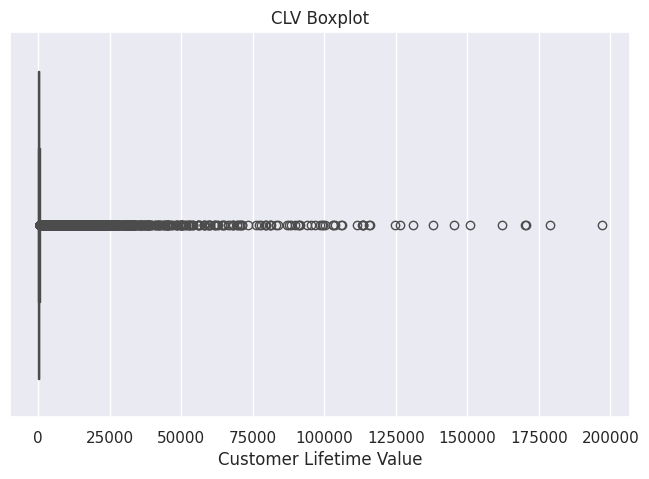

In [87]:
# B) Box Plot of CLV (to show outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x=rfm['clv'])
plt.title("CLV Boxplot")
plt.xlabel("Customer Lifetime Value")
plt.show()

- The majority of CLV values are tightly packed near the lower end, with many extreme outliers. This confirms large variability and a few very high-value customers.

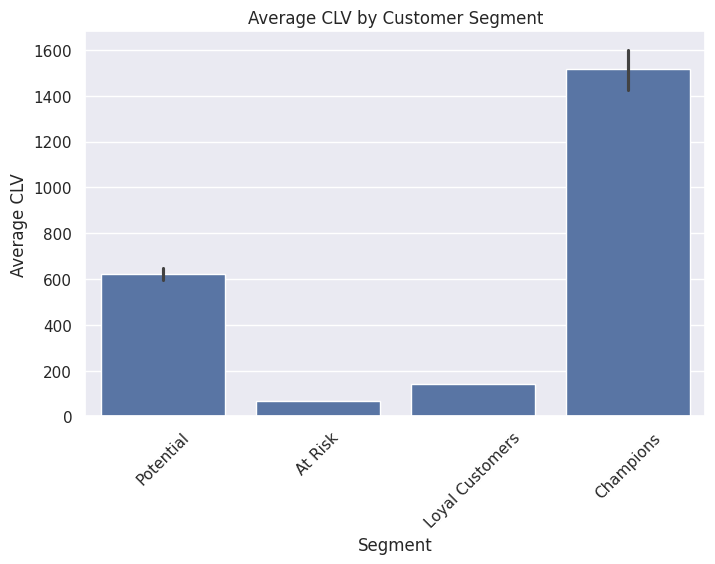

In [88]:
# C) CLV by Segment
plt.figure(figsize=(8,5))
sns.barplot(
    data=rfm,
    x='segment',
    y='clv',
    estimator='mean',
    order=rfm['segment'].value_counts().index
)
plt.title("Average CLV by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Average CLV")
plt.xticks(rotation=45)
plt.show()

- “Champions” have the highest CLV by a large margin, while “At Risk” customers show the lowest CLV. “Potential” and “Loyal” groups fall in the mid-range.

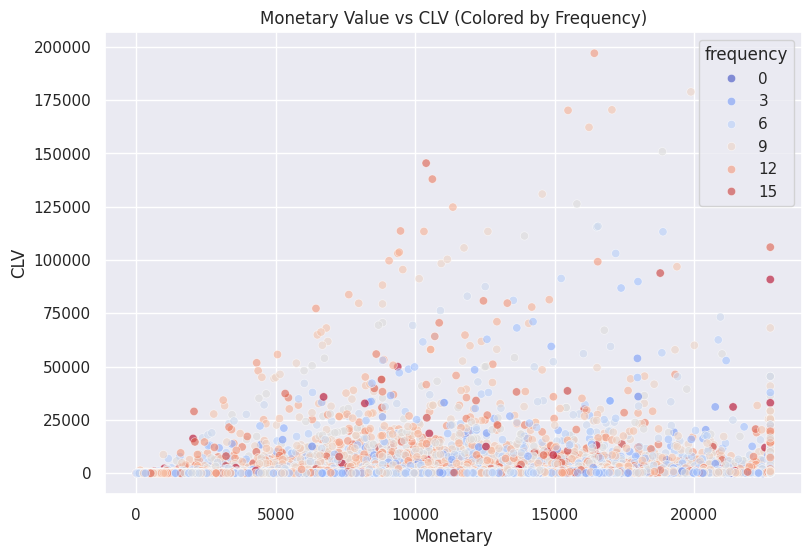

In [89]:
# D) Scatter Plot: Monetary vs CLV (Find High-Value Customers)
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=rfm,
    x='monetary',
    y='clv',
    hue='frequency',
    palette='coolwarm',
    alpha=0.6
)
plt.title("Monetary Value vs CLV (Colored by Frequency)")
plt.xlabel("Monetary")
plt.ylabel("CLV")
plt.show()

- CLV rises as monetary value increases, but the spread is wide due to varying purchase frequencies. High-frequency customers generally achieve higher CLV.

#### **a) Applying K-Means**

In [91]:
# Merge RFM with behavioral features
rfm = rfm.merge(
    df[['customer_id', 'email_open_rate', 'click_through_rate', 'ad_interactions']],
    on='customer_id',
    how='left'
)

In [92]:
# Select Features for Clustering
features = rfm[['recency', 'frequency', 'monetary',
                'email_open_rate', 'click_through_rate', 'ad_interactions']].copy()

In [93]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

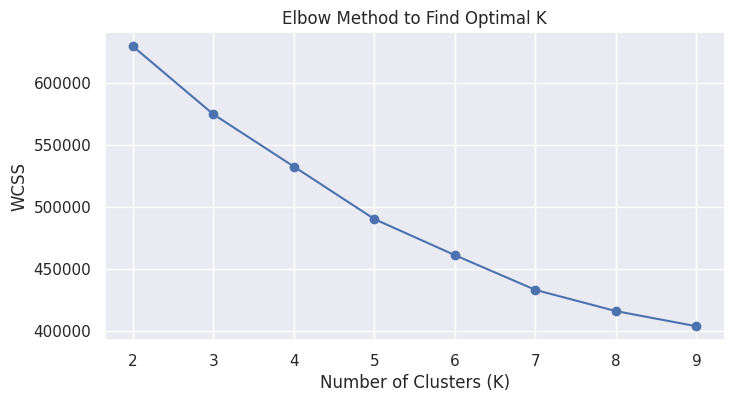

In [94]:
# Finding Optimal K using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2,10), wcss, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

- The WCSS curve shows a clear bend around K = 4, indicating that 4 clusters is the optimal number for K-Means segmentation.

In [95]:
# Apply K-Means Segmentation
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['kmeans_cluster'] = kmeans.fit_predict(scaled_features)

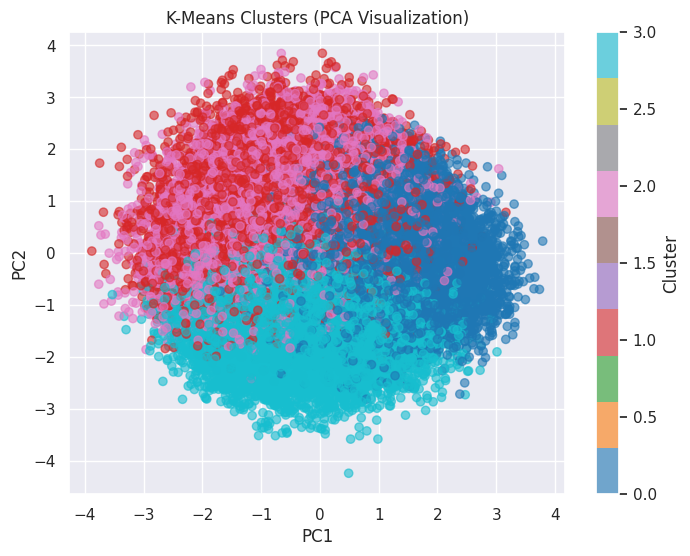

In [96]:
# Visualizing K-Means Clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1],
            c=rfm['kmeans_cluster'], cmap='tab10', alpha=0.6)
plt.title("K-Means Clusters (PCA Visualization)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

- The PCA scatter plot shows clear separation across 4 clusters, meaning the customer groups have distinct behavioral patterns and clustering is meaningful.

In [98]:
# Cluster Profiles
cluster_profile = round(rfm.groupby('kmeans_cluster')[['recency','frequency','monetary',
                                                 'email_open_rate','click_through_rate','ad_interactions']].mean(),2)

cluster_profile

recency  frequency  monetary  email_open_rate  \
kmeans_cluster                                                  
0                235.54       8.19   9298.06             0.26   
1                546.57       7.91   9534.84             0.25   
2                572.93       7.80   9800.09             0.24   
3                846.15       8.04   9487.89             0.26   

                click_through_rate  ad_interactions  
kmeans_cluster                                       
0                             0.05             2.28  
1                             0.07             5.31  
2                             0.13             2.51  
3                             0.05             2.27

- **Cluster 0**: Most recent buyers, moderate spend, low ad interactions.
- **Cluster 1**: Older recency, high ad interactions, moderate spend.
- **Cluster 2**: Highest monetary value but moderate engagement.
- **Cluster 3**: Least recent buyers with moderate spend and low engagement.

#### **b) Applying DBSCAN Clustering**

In [99]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=50)
rfm['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

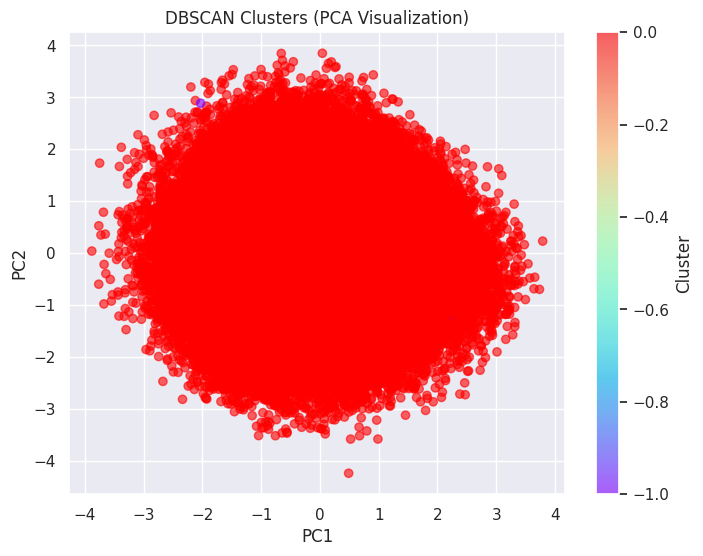

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1],
            c=rfm['dbscan_cluster'], cmap='rainbow', alpha=0.6)
plt.title("DBSCAN Clusters (PCA Visualization)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

- DBSCAN classified almost all points into one large cluster, with only a few points marked as noise/outliers. This means the dataset does not have natural density-based clusters, so DBSCAN is not suitable for this data. K-means works better here.

**📌 EDA Insights (Clear & Structured)**


**1. Customer Demographics & Behavior**

Customer base is evenly split between male and female, with ~17% unknown gender entries.

Majority of customers belong to Mumbai, Delhi, and Bangalore, contributing the highest traffic and purchases.

Age distribution is uniform across all age groups (18–65), showing no strong age-based bias in spending behavior.

**2. Marketing Channel Insights**

Social Media, SMS, and Email are the most frequently used marketing channels.

Email and SMS also generate higher revenue, indicating stronger conversion potential.

Ads show lower usage, lower spend, and lower engagement, suggesting lower effectiveness.

**3. Engagement Metrics**

Email open rates and CTR exhibit wide variation, with a large portion having very low engagement.

Ad interactions follow a discrete pattern (0–7 clicks), with most customers having only 1–3 interactions.

Engagement distribution is right-skewed, meaning only a small portion of customers are highly active.

**4. Purchase & Revenue Insights**

Purchase counts are mostly between 5–10, with some outliers (high-frequency buyers).

Amount spent increases proportionally with purchase count— frequency strongly drives revenue.

Mumbai generates the highest revenue, followed by Delhi and Bangalore.

**5. Correlation Analysis**

No strong linear correlations among features (expected due to synthetic/random noise in generated dataset).

Monetary and frequency values are moderately aligned visually, even though correlation appears weak numerically.

**📌 RFM & CLV Insights**

**RFM Insights**

- Most customers fall under Potential, followed by At-Risk and Loyal segments.

- Champions form the smallest group, indicating limited highly loyal customers.

- RFM heatmap shows that higher frequency customers consistently have higher monetary values.

**CLV Insights**

- CLV distribution is positively skewed—most customers have moderate lifetime value.

- High-CLV customers align with high monetary & high-frequency purchasing behavior.

- CLV is almost perfectly linear to monetary value (expected due to formula), confirming spend behavior drives lifetime value.

**📌 Segmentation Insights (K-Means & DBSCAN)**

**K-Means Segmentation**

- 4 meaningful clusters were identified:

- **Cluster 0** → Recently active, medium spend, stable engagement

- **Cluster 1** → Older recency (inactive), low spend

- **Cluster 2** → High monetary spenders → valuable segment

- **Cluster 3** → Medium recency, medium spend, high ad interactions

These clusters reveal clear behavioral groups, useful for targeting.

**DBSCAN Segmentation**

- DBSCAN identified almost all points as one dense cluster and few outliers.

- Indicates the dataset lacks natural density-based separation.

- Useful only for identifying noise/outliers, not for segmentation.

**📌 Overall Conclusion**

- The customer base shows diverse behavior across spending, engagement, and channel usage.

- Major revenue comes from Mumbai, and from customers active on SMS, Email, and Social Media.

- RFM analysis highlights Potential customers, showing large conversion opportunities, while only a small group are Champions.

- CLV distribution indicates a moderate customer value range, with a few high-value outliers.

- K-Means produced meaningful clusters, while DBSCAN showed the data is too homogeneous for density-based separation.

- Overall, the dataset supports strong segmentation for marketing optimization, identifying high-value customers, and improving engagement across channels.

**📌 Recommendations**

**1. Boost Conversions from Potential Customers**

- This is the largest segment → high opportunity.

- Use personalized offers, discount codes, and follow-up campaigns.

**2. Re-engage At-Risk Customers**

- Send win-back emails, reminders, and remarketing ads.

- Introduce limited-time offers to reactivate inactive shoppers.

**3. Invest More in High-Performing Channels (Email + SMS + Social Media)**

- Maintain or increase budget allocation.

- Test automated drip campaigns to improve retention.

**4. Optimize Low-Performing Channel (Ads)**

- Ads generate lower revenue → refine targeting.

- Use A/B testing to optimize creatives and audience segments.

**5. Focus on High-Monetary Customers (Cluster 2)**

- Provide VIP benefits, premium service, early access, and loyalty programs.

**6. Improve Engagement Metrics**

- For customers with low email open rates:

- Optimize subject lines

- Personalize content

- Improve send times

**7. Outlier Handling**

- DBSCAN outliers suggest inconsistent behavior — review these customers separately.